## TMA4320 vår 2022 - Biofysikkprosjekt
Laget av Albert bayazidi, Abinida Jeyarajah, Synne Gilbu
### Innledning

De mest kjente organellene vi vet om har membranbunde strukturer. Likevel inneholder celler også mange organeller uten membraner. Det er nettopp disse organellene vi ønsker å undersøke nærmere i dette prosjektet. Disse membranfrie organellene kan bli beskrevet som væskedråper. Mellom disse dråpene vil det virke elektrostatiske interaksjoner, og disse er langvarige, men deres intensitet avtar i en vandig løsning.

Celler har en rekke proteiner som katalyserer reaksjoner som i praksis “slår” av en positiv ladning, eller introduserer en negativ. Dette gjør at vi kan ha en mer presis kontroll over interaksjonene. 

Biopolymerer er molekyler som har repeterende enheter (monomerer) som er forbundet med kovalente bindinger. Polymerer har også den egenskapen at de er fleksible. De har evnen til å tilpasse formen sin for å best kunne samhandle med overflater og andre molekyler.

Det er vanskelig å fysisk undersøke disse organellene fordi når man ser på de i et mikroskop vil det ikke være like tydelig kontrast mellom væska i organellene og væsken i cellen. På grunn av dette faktumet ønsker vi da å undersøke organellene ved å programmere bevegelsen deres og måten de interagerer på, for å bygge opp vår forståelse av disse dråpelignede organellene.

In [2]:
#importerer nødvendige bibliboteker
%matplotlib inline
import numpy as np #importerer numpybibliotek 
import matplotlib.pyplot as plt #importerer matplot (for plotting av funksjoner)
import random #importerer randombibliotek
from numba import jit, objmode #importerer jit (just in time) slik at funksjonene kjøres raskere

#Vi bruker "@jit(nopython=True)" over en funksjon vi vil kjøre raskere

#### OPPGAVE 1 

#### PARAMETER  
$ε_r$ = 78  
a = 23 µm

Vi ønsker å plassere monomerer tilfeldig i et løsningsmiddel. Løsningsmiddelet har ladning 0, så det vil være lett gjenkjennelig. Siden det ikke skal gå ann å plassere monomerer på hverandre, har vi tatt hensyn til det ved å kun plassere monomerene der ladningen i løsningsmiddelet er = 0.

Her tar vi inn en matrise-størrelse (N) og antall ønskede monomerer (M). Deretter returnerer vi en grid med et visst antall monomerer som er tilfeldig plassert.

In [3]:
#Forklaring av parametervariabler
# N: gridstørrelsen 
# M: monomerverdi

@jit(nopython=True)
def generereGridMonomer(N, M):
    gridArray = np.zeros((N,N),dtype=np.int64) #lager en NxN grid med bare nullverdier
    i = -M #begynner på den minste M-veriden
    
    while i <= M: #iterer gjennom alle monomerverdiene (første while-løkke)
        if i != 0: #ønsker ikke å ha med 0 som en verdi for et monomer, da dette representerer løsningen
            xKoordinat = random.randint(0, N-1) #tilfeldig tall
            yKoordinat = random.randint(0, N-1) #tilfeldig tall
            
            #sjekker at koordinatet vi har valgt ikke overskriver en annen monomer (andre while-løkke)
            while gridArray[xKoordinat, yKoordinat] != 0: 
                xKoordinat = random.randint(0, N-1) #tilfeldig tall
                yKoordinat = random.randint(0, N-1) #tilfeldig tall
                
            #her avsluttes andre while-løkke 
                
            gridArray[xKoordinat, yKoordinat] = i #legger en monomer i det tilfeldige koordinatet 
            
            i+=1 #legger til en slik at vi begynner på neste monomerer
            
            
        else:
            i+=1 #legger til en slik at vi begynner på neste monomerer
            
        #her avsluttes if-setningen
    
    #her avsluttes første while-løkke
        
    return gridArray #returnerer griden med fylte monomerer

In [10]:
N = 10
M = 6
grid = generereGridMonomer(N, M)
print(grid)

[[-1  1  0  0  0  0  0  0 -3  0]
 [ 0  0  0  0  0  0  0 -6  0  2]
 [ 0  0  0 -5  0  0  0  0  0  3]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  4  0  0  0  0  0]
 [ 0  0  0  0  5  0  0  0  0  0]
 [ 0  0  0  0  6  0  0  0  0  0]
 [ 0  0  0  0  0 -4  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 -2  0  0  0  0  0  0]]


Her ser vi at antall monomerer i løsningsmiddelet er 2M.  

Nå som vi har et grid med verdiene [-M...,0,...M] kan vi visualisere det på en mer hensiktsmessig måte enn å bare printe griden. Dette gjør vi ved å lage et heatmap. Da utnytter vi det faktumet at ladningen til monomerene varierer og at løsningsmiddelet har ladning 0.

In [5]:
#Forklaring av parametervariabler
#Grid: griden vi vil visualisere 
#N: gridstørrelse 
#M: monomerverdi
#tittel: navnet på plottet 

def visualisereGrid(grid,N, M,tittel):
    cb = plt.imshow(grid, # grid
    cmap='jet', # Fargevalg
    vmin=-M, vmax=M, # min- og maxgrense 
    extent=(0, N, 0, N)) #start og slutt verdi på tabell i x- og y-retning
    plt.title(f'Heatmap - {tittel}',fontweight ="bold") #tittel på plottet
    cb = plt.colorbar() #legger til fargebar på siden
    plt.show() #aktivere plottet 

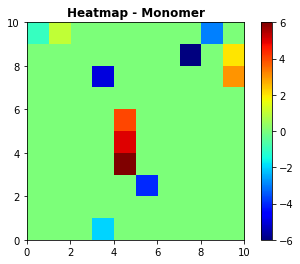

In [11]:
visualisereGrid(grid,N, M,"Monomer")

Når vi skal regne ut $V_{kl}$ mellom monomerer er det viktig å kunne se hva koordinatene til naboene er.
Her tar vi inn størrelsen av griden og indeksene til det monomeret vi ønsker og se på, og lager en array bestående av koordinatene til de fire plasseringene rundt. 

Rekkefølgen på koordinatene vil være høyre = 0, venstre = 1, opp = 2 og ned = 3.

In [52]:
#Forklaring av parametervariabler
# N = gridstørrlese
# i = y-koordinat
# j = x-koordinat 
# Funksjonen henter ut naboene til koordinatet [i, j]

@jit(nopython=True)
def faaNaboKoordinater(N,i,j):
    naboKoordinaterArray = np.zeros((4,2),dtype = np.int64) #lager en array med kun nullverdier
    
    if i == 0 and j == N-1: #Øvre høyre hjørne
        naboKoordinaterArray[0] = ([i,0])
        naboKoordinaterArray[1] = ([i,j-1])
        naboKoordinaterArray[2] =([N-1,j])
        naboKoordinaterArray[3] =([i+1,j])
        
    elif i == N-1 and j == N-1:#Nedre høyre hjørne
        naboKoordinaterArray[0] = ([i,0])
        naboKoordinaterArray[1] = ([i,j-1])
        naboKoordinaterArray[2] =([i-1,j])
        naboKoordinaterArray[3] =([0,j])
        
    elif i == N-1 and j == 0:#Nedre venstre hjørne
        naboKoordinaterArray[0] = ([i,j+1])
        naboKoordinaterArray[1] = ([i,N-1])
        naboKoordinaterArray[2] =([i-1,j])
        naboKoordinaterArray[3] =([0,j])
        
    elif i == 0 and j == 0:#Øvre venstre hjørne
        naboKoordinaterArray[0] = ([i,j+1])
        naboKoordinaterArray[1] = ([i,N-1])
        naboKoordinaterArray[2] =([N-1,j])
        naboKoordinaterArray[3] =([i+1,j])
        
    elif i == 0:#Øverste rad
        naboKoordinaterArray[0] = ([i,j+1])
        naboKoordinaterArray[1] = ([i,j-1])
        naboKoordinaterArray[2] =([N-1,j])
        naboKoordinaterArray[3] =([i+1,j])
        
    elif i == N-1:#Nederste rad
        naboKoordinaterArray[0] = ([i,j+1])
        naboKoordinaterArray[1] = ([i,j-1])
        naboKoordinaterArray[2] =([i-1,j])
        naboKoordinaterArray[3] =([0,j])
        
    elif j == N-1:#Borteste kolonne
        naboKoordinaterArray[0] = ([i,0])
        naboKoordinaterArray[1] = ([i,j-1])
        naboKoordinaterArray[2] =([i-1,j])
        naboKoordinaterArray[3] =([i+1,j])
    elif j == 0:#Første kolonne
        naboKoordinaterArray[0] = ([i,j+1])
        naboKoordinaterArray[1] = ([i,N-1])
        naboKoordinaterArray[2] =([i-1,j])
        naboKoordinaterArray[3] =([i+1,j])  
        
    else:#Generelt (utenom spesialtilfellene)
        naboKoordinaterArray[0] = ([i,j+1])
        naboKoordinaterArray[1] = ([i,j-1])
        naboKoordinaterArray[2] =([i-1,j])
        naboKoordinaterArray[3] =([i+1,j])
        
    #Her avsluttes if-setningen
        
        
    return naboKoordinaterArray #returnerer en array med alle nabokoordinatene 

Nå som vi kan hente nabokoordinatene til et hvert monomer kan vi beregne totalenergien. Her finner vi den samlede energien til alle monomerene ved hjelp av $\sum\limits_{k,l}V_{kl}$, der $V_{kl} = w_kw_l\alpha$ og $\alpha = \frac{e^2}{4\pi\epsilon_0\epsilon_ra^2}$ og $w$ representerer fortegnet til monomeret. Ved å summere sammen alle fortegnene ganget med alpha, vil vi få samlet energi. Som hovedregel må vi dele den totale energien vi finner fra funksjonen på 2. Det eneste unntaket er når vi har en 2x2-matrise. Da må vil dele den totale energien på 4.

In [8]:
#Forklaring av parametervariabler
#Grid: Beregner energien til griden vi tar inn

@jit(nopython=True)
def totalEnergiAvGridMonomer(grid): 
    alpha = 5.6*10**-21 
    energiTot = 0 #total energi
    
    i = 0 
    #itererer gjennom hele matrisa
    while i < N: #iterer gjennom y-verdiene i matrisa (første while-løkke)
        j = 0
        while j < N: #itererer gjennom x-verdiene i matrisa (andre while-løkke)
            
            #lager array med alle nabokoordinatene til koordinatet vi iterer over
            naboKoordinaterArray = faaNaboKoordinater(N,i,j) 
            k = 0
            while k < 4: #Itererer gjennom alle nabokoordinatene (tredje while-løkke)
                
                iNaboKoordinat = naboKoordinaterArray[k][0] #får tak i i-verdien til nabokoordinatet 
                jNaboKoordinat = naboKoordinaterArray[k][1] #får tak i j-verdien til nabokoordinatet
                
                if ((grid[iNaboKoordinat, jNaboKoordinat] * grid[i][j]) > 0): #positiv multiplikasjon skal gi energi +1
                    energi = alpha #må gange med alpha
                    
                elif ((grid[iNaboKoordinat, jNaboKoordinat] * grid[i][j]) < 0): #negativ multiplikasjon skal gi energi -1
                    energi = -alpha #må gange med alpha
                    
                else:
                    energi = 0 #hvis monomereren ikke har en nabo så skjer det ingen interaksjon, altså energi = 0
                #Her avsluttes if-setningen
            
                energiTot += energi #legger til energien i energitotal for hver interaksjon 
                
                k+=1 
            #Her avsluttes tredje while-løkke
                
            j+=1
        #Her avsluttes andre while-løkke
            
        i+=1
    
    #Her avsluttes første while-løkke

        
    if N == 2: #spesialtilfelle for 2x2-matrise
        energiTot = energiTot/4
        return energiTot #returnerer total energien til griden
    
    else: #generelt 
        energiTot = energiTot/2
        return energiTot #returnerer total energien til griden
    #Her avsluttes if-setningen

In [12]:
energi = totalEnergiAvGridMonomer(grid)
print(f"Energien fra griden i oppgave 1b) = {energi}J")

Energien fra griden i oppgave 1b) = 1.1199999999999999e-20J


Vi valgte ikke å gjøre energien dimensjonsløs fordi vi gjør dette i Monte Carlo funksjonen. 

Vi ønsker å ta en nærmere titt på hvordan energien utvikler seg over tid, og når den nærmer seg likevekt. Dette gjør vi ved å implementere Metropolis algoritmen, som er en Markovkjede Monte Carlo metode. Monte Carlo metodens definerende egenskap er at disse algoritmene benytter seg av tilfeldig prøvetaking.

In [13]:
#Forklaring av parametervariabler
#Grid: griden med monomerer vi vil flytte
#MonomerVerdi: verdien til monomerer vi ønsker å flytte
#Retning: retningen vi øsnker å flytte monomerene 

@jit(nopython=True)
#Funksjonen er hentet fra "Kom-i-gang notat"
def flyttMonomer(grid, monomerVerdi, retning, N): 
    monomerVerdiKoordinater = np.argwhere(grid==monomerVerdi)[0] #henter koordinatet til monomereren vi vil flytte
    #finner nabokoordinatene til monomereren vi vil flytte
    naboKoordinaterArray = faaNaboKoordinater(N, monomerVerdiKoordinater[0], monomerVerdiKoordinater[1])
    #henter ut nabokoordinatet til den retningen vi skal flytte oss i 
    onskedeNaboKoordinat = naboKoordinaterArray[retning] 

    #sjekker om punktet vi skal flytte monomereren til er ledig
    if grid[onskedeNaboKoordinat[0], onskedeNaboKoordinat[1]]==0: 
        #flytter monomereren til det ledige punktet
        grid[onskedeNaboKoordinat[0], onskedeNaboKoordinat[1]] = monomerVerdi 
        #setter punktet der monomeren befant seg før flyttingen lik 0
        grid[monomerVerdiKoordinater[0], monomerVerdiKoordinater[1]] = 0 
        return True #returnerer true hvis monomeren har blitt flyttet på seg
    
    else:
        return False #returnerer false hvis monomeren ikke har blitt flyttet på seg (ulovig steg)
    #Her avsluttes if-setningen

In [14]:
#Forklaring av parametervariabler
#N_s: antall Monte Carlo steg
#N: gridstørrelse
#M: monomerverdi 
#T: temperatur i kelvin

@jit(nopython=True)
def montecarloMonomer(N_s,grid, N, M, T): 
    alpha = 5.6*10**-21 
    epsilon = np.zeros(N_s, dtype=np.int64) #lager en array med nullverdier til energien
    energi = totalEnergiAvGridMonomer(grid) #finner energien til griden
    epsilon[0] = energi #legger til denne energien som første element i energi-arrayen
    kb = 1.38*10**(-23) 
    beta = 1/(kb*T)
    i = 0
    while i < N_s: #kjører algoritmen under N_s ganger (første while-løkke)
        gammelgrid = np.copy(grid) #lager en kopi så vi kan gjenbruke griden om betingelsene under ikke stemmer
        p = random.random() #velger en tilfeldig sannsynlighet
        energi = totalEnergiAvGridMonomer(grid) #finner energien til griden
        monomerVerdi = random.randint(-M, M) #velger en tilfeldig monomer
        retning = random.randint(0, 3) #velger en tilfeldig retning
        while monomerVerdi == 0:  #hvis vi velger en monomer med verdi lik null (andre while-løkke)
            monomerVerdi = random.randint(-M, M)
        #Her avsluttes andre while-løkke
        #prøver å flytte på monomereren. Returnerer True hvis monomereren ble flytta, og vice versa. 
        #gammelgrid blir oppdatert etter flyttingen
        sjekkOmMonomererenHarFlyttetPaaSeg = flyttMonomer(gammelgrid, monomerVerdi, retning, N)

        if sjekkOmMonomererenHarFlyttetPaaSeg == True: #kjører hvis monomereren har blitt flytta. (Første if-setning)
            nyEnergi = totalEnergiAvGridMonomer(gammelgrid) #finner energien til nygrid 
            
            if nyEnergi < energi: #sjekker om nyenergien er mindre enn gammel. (Andre if-setning)
                grid = np.copy(gammelgrid) # kopier gammelgrid
                energi = nyEnergi # setter gammel enrgi lik ny
            #hvis sannsynlig er mindre enn boltzmannsfaktoren av energidifferansen
            elif p < np.exp(-beta*(nyEnergi - energi)): 
                grid = np.copy(gammelgrid) 
                energi = nyEnergi
            else:
                """ikke gjør noe"""
            #Her avsluttes andre if-setningen
        
        else:
            """ikke gjør noe"""
        #Her avsluttes første it-setningen
                
        epsilon[i] = energi/alpha #legger til energien etter at griden har gått gjennom algoritmen     
        i+=1
    #Her avsluttes første while-løkke
        
    montecarlogrid = grid #bytter navnet på griden til montecarlogrid
        
    return epsilon, montecarlogrid

Nå som Monte Carlo er implementert kan vi bruke den til å gjøre noen simuleringer. Her kjører vi Monte Carlo funksjonen for temperaturer lik 200K og 500K. 

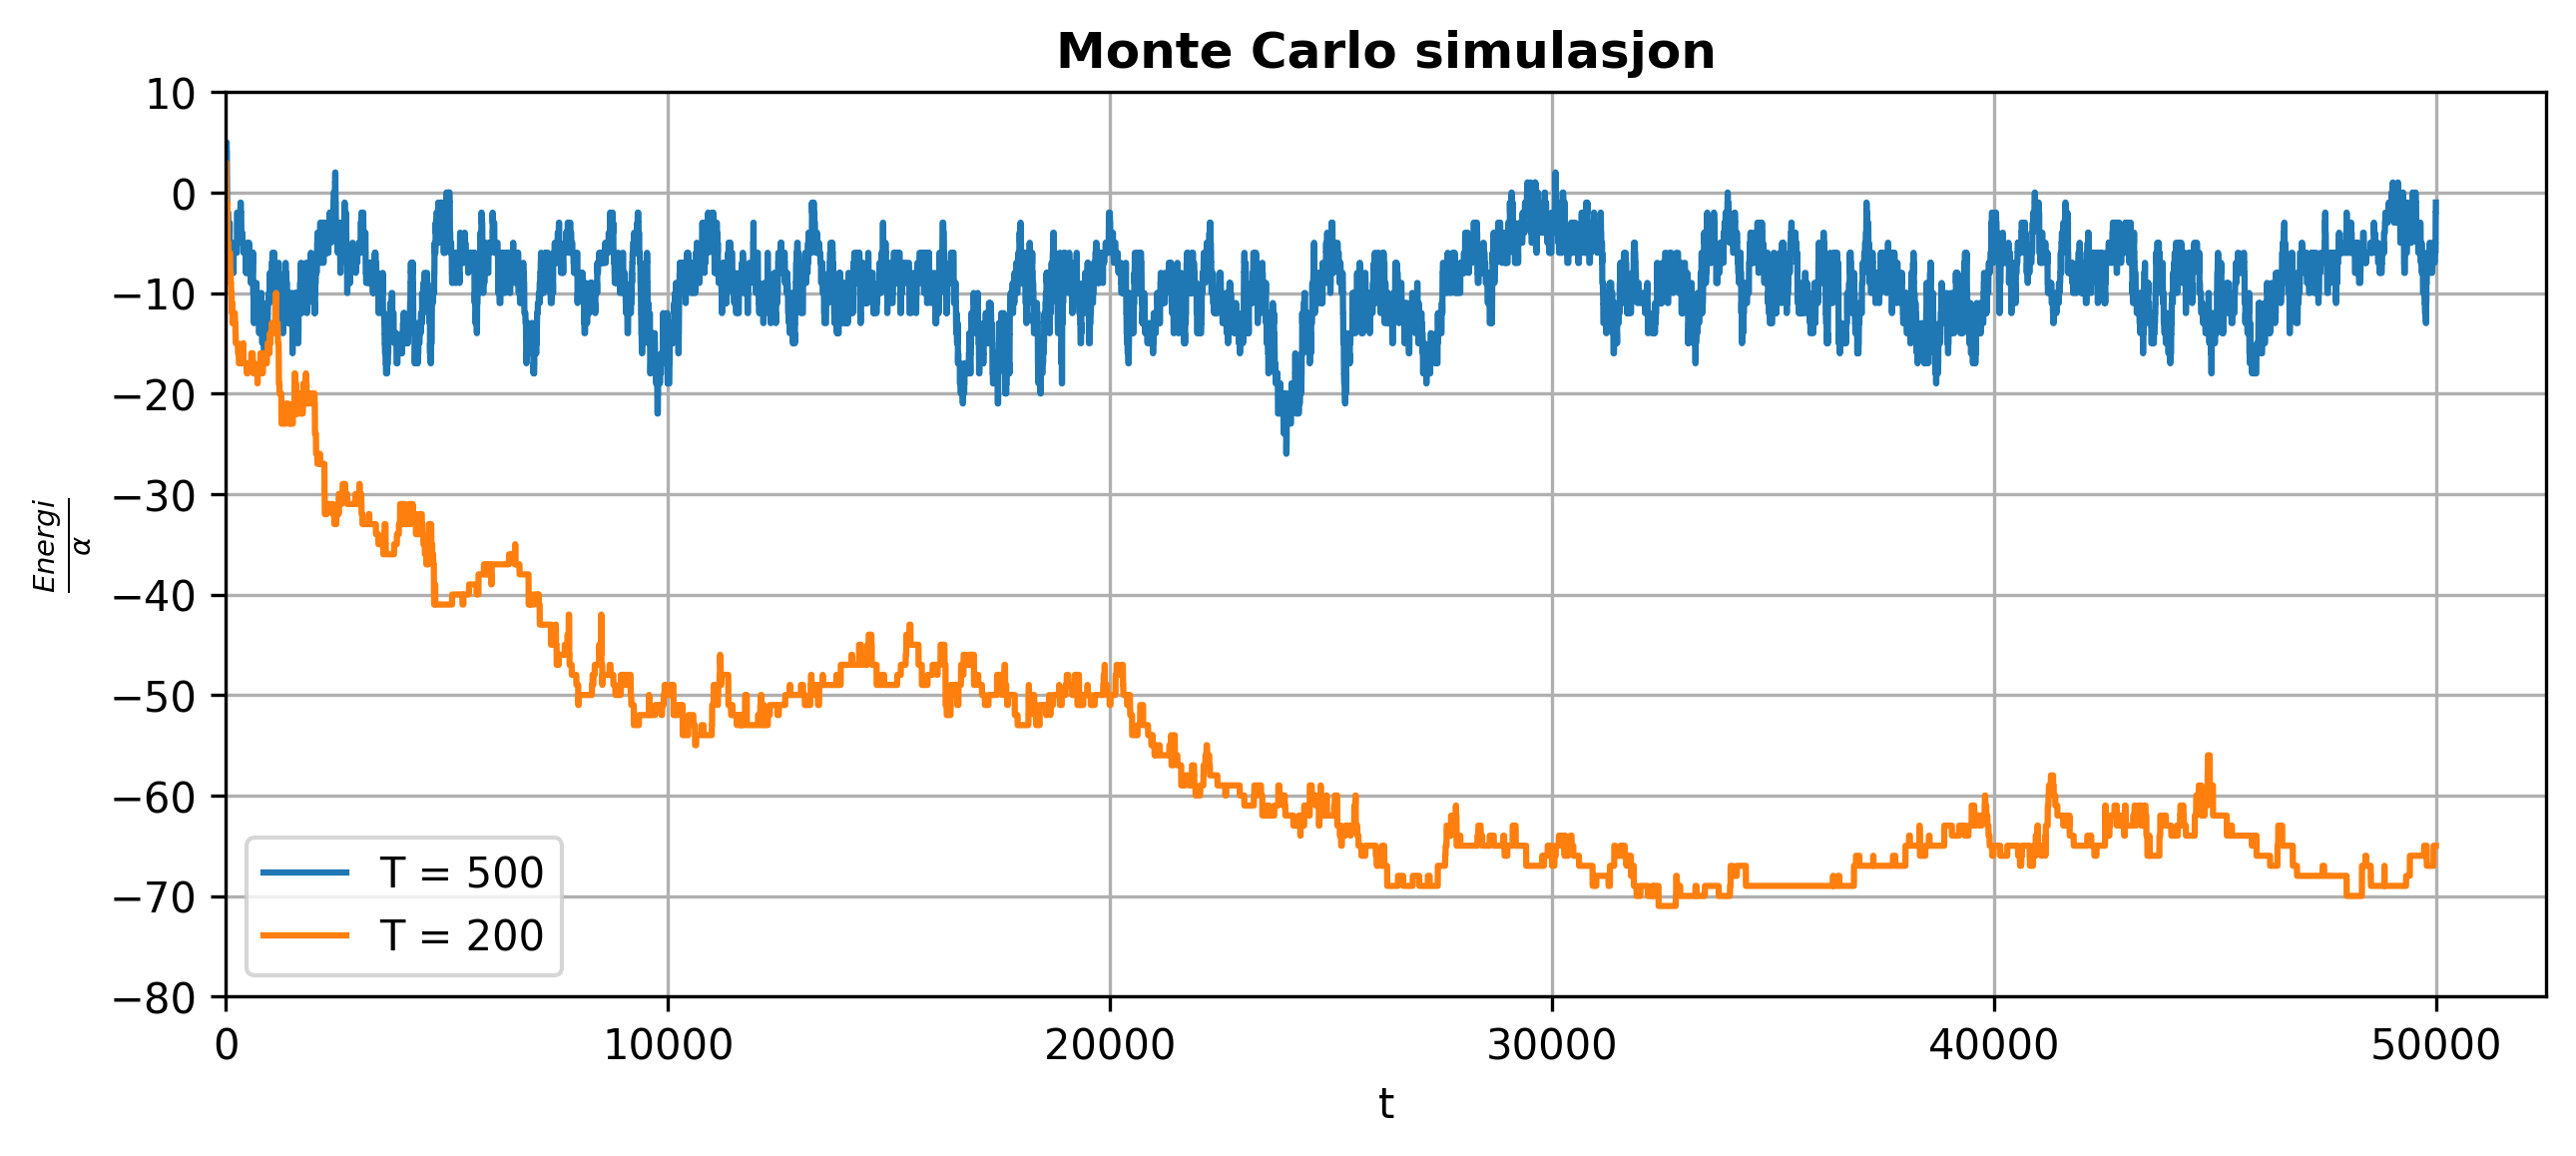

In [16]:
#Variabler
N_s = 50000
N = 15
M = 25

grid = generereGridMonomer(N,M)
energiTemperaturLik500, gridTemperaturLik500 = montecarloMonomer(N_s,grid,N,M,500) #kjører MC for temperatur lik 500K
energiTemperaturLik200, gridTemperaturLik200 = montecarloMonomer(N_s,grid,N,M,200) #kjører MC for temperatur lik 200
np.savez("gridTemperaturLik200",gridTemperaturLik200) #lagrer gridTemperaturLik200 som en fil


#Plottet begynner her 
plt.figure(figsize=(10, 4), dpi=300)
plt.plot(energiTemperaturLik500, label='T = 500') #  plot av funk for t = 500
plt.plot(energiTemperaturLik200, label='T = 200') #  plot av funk for t = 200 
plt.xlabel('t') #setter navn på x-aksen
plt.ylabel(r'$\frac{Energi}{α}$') #setter navn på y-aksen
plt.legend(loc="lower left") #plasserer legend i venstre hjørnet 
plt.xlim(0, 1.05*N_s) #Setter x-aksen til å gå fra 0 til 1.05*N_s
plt.ylim(-80, 10)   #Setter y-aksen til å gå fra -80 til 10
plt.grid(1) #setter på rutenett
plt.title("Monte Carlo simulasjon",fontweight ="bold") #tittel på plottet
plt.show() #aktiverer plottet 

Når $N_s$ er 50.000 ser vi fra plotet at energien til systemet stabiliserer seg rundt $t_{equil}$ ≈ 20000 for T = 200K. For T = 500K ser vi at funksjonen har nådd likevekt fra begynnelsen. Dette vil selvfølgelig varierer litt fra simulasjon til simulasjon, da vi har denne sannsynligheten som varierer fra simulasjon til simulasjon. Senere vil vi se at verdien for $t_{equil}$ ikke nødvednigvis er helt korrekt. 

Grunnen til at $t_{equil}$ er forskjellig for de to temperaturene er fordi ved høyere temperaturer, får vi høyere energier. Det vil føre til at det er lettere for monomerene å bryte fra hverandre og $t_{equil}$ vil bli lavere. Rent matematisk kan det forklares ved at $\beta$ blir mindre ved større T. Dermed vil sannsynligheten for å akseptere en lavere energi vil øke. Dette kommer av at energien kan bli akseptert ved $exp(-\beta\Delta E) > p$, der $p$ er en tilfeldig sannsynlighet.

Siden vi er interessert i å undersøke monomer i klynger må vi ha en funksjon som setter sammen monomerene som er naboer. I tillegg velger vi å indeksere klyngene. 

In [18]:
#Forklaring av parametervariabler
#MontecarloGrid = griden med monomerer vi skal sette sammen til klynger 
#M = antall monomerer i griden

@jit(nopython=True)
def recursiveKlynge(klyngeIndex, klyngeGrid, i,j,N, montecarloGrid):
    if montecarloGrid[i][j] != 0: #sjekker om punktet har en monomer (første if-setning)
        klyngeGrid[i][j] = klyngeIndex #setter den lik clusterindexen
        naboKoordinaterArray = faaNaboKoordinater(N,i,j) #finner nabokoordinatene til den monomereren 
    #Her avsluttes første if-setning
        k = 0
        while k<4: #itererer gjennom alle nabokoordinatene (første while-løkke)
            iNaboKoordinat = naboKoordinaterArray[k][0] #henter ut i-verdien til nabokoordinatet 
            jNaboKoordinat = naboKoordinaterArray[k][1] #henter ut j-verdien til nabokoordinatet
                
            #sjekker om nabokoordinatet har en monomer og om den ikke er avdekket av clusterGrid 
            if montecarloGrid[iNaboKoordinat][jNaboKoordinat] != 0 and klyngeGrid[iNaboKoordinat][jNaboKoordinat] == 0:
                recursiveKlynge(klyngeIndex, klyngeGrid, iNaboKoordinat,jNaboKoordinat,N, montecarloGrid)
            
            k+=1
        #Her avsluttes første while-løkke
        
        
@jit(nopython=True)
def klynge(montecarloGrid, M):
    N = montecarloGrid.shape[0] #finner gridsize
    klyngeGrid = np.zeros((N,N), dtype=np.int64) #en NxN grid med nullverdier 
    #clusterindex representerer verdien til en cluster. Alle monomerer i samme cluster har lik clusterIndex
    klyngeIndex = 1 

    i = 0
    #iterer gjennom griden 
    while i < N: #iterer gjennom y-aksen (første while-løkke)
        j = 0
        while j < N: #iterer gjennom x-aksen (andre while-løkke)
            #finner en monomer i griden, og som ikke er avdekket av clusterGrid (første if-setning)
            if montecarloGrid[i][j] != 0 and klyngeGrid[i][j] == 0: 
                recursiveKlynge(klyngeIndex, klyngeGrid, i,j,N, montecarloGrid) 
                klyngeIndex +=1 #begynner på en ny klynge 
            #Her avsluttes første if-setning
                
            j+=1
        #Her avsluttes andre while-løkke
        
        i+=1
    #Her avsluttes første while-løkke
        

    return klyngeGrid, klyngeIndex

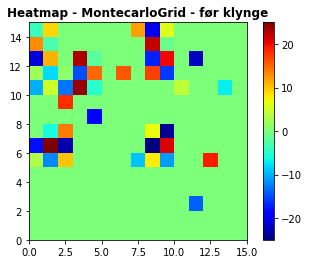

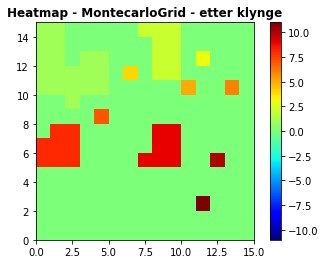

In [19]:
npzfile = np.load("gridTemperaturLik200.npz") #Åpner filen
montecarloGrid = npzfile['arr_0'] #Velger 


figMontecarloGrid = visualisereGrid(montecarloGrid,N, M,"MontecarloGrid - før klynge")
klyngeMontecarloGrid, klyngeIndex = klynge(montecarloGrid, M)
figKlyngeMontecarloGrid = visualisereGrid(klyngeMontecarloGrid,N, klyngeIndex-1,"MontecarloGrid - etter klynge")
            

En viktig egenskap klyngene har er størrelsen på klyngene, d. Vi ønsker å se hvordan gjennomsnittet av avhenger av temperaturen. Siden denne d-verdien er gjennomsnitt av verdier som er tilfeldige vil det være en viss grad av variasjon i plottet.

In [20]:
#Forklaring av parametervariabler
#klyngeGrid = griden der vi har satt sammen klynger
#klyngeIndex = antall klynger +1

@jit(nopython=True)
def dgjennomsnitt(klyngeGrid, klyngeIndex):
    storrelse = len(np.argwhere(klyngeGrid)) #finner alle monomerer i klyngeGrid
    return storrelse/(klyngeIndex-1) #finner gjennomsnittet av klyngestørrelsen

In [21]:
@jit(nopython=True)
def tEquil(temperatur):
    temperaturMax = 100000
    s = 1/200 #konstant
    c = 10000 #konstant
    temperaturLav = 100 #temperatur minimum
    
    return temperaturMax*np.exp(-s*(temperatur-temperaturLav)) + c

In [22]:
#Forklaring av parametervariabler
#N_s = antall MC steg
#N = gridstørrelse 
#M = monomerverdi 

@jit(nopython=True)
def dGjennomsnittForGittTemperatur(N_s,N,M,temperatur):
    energiTemperatur, gridTemperatur = montecarlo(int(N_s), N, M, int(temperatur)) #kjører MC for en gitt temperatur
    klyngeGrid,klyngeIndex = klynge(gridTemperatur,M) #setter sammen klynger i griden vi får fra MC
    d = dgjennomsnitt(klyngeGrid,klyngeIndex) #finner gjennomsnittet av klyngestørrelsen
    return d

In [25]:
#Forklaring av parametervariabler
#temperatur_array = array over ulike temperaturer 
#N = gridstørrelse 
#M = monomerverdi

@jit(nopython=True)
def dGjennomsnittForFlereTemp(temperatur_array,N,M):
    dGjennomsnittArray = np.zeros(10,dtype=np.int64)
    g = 0
    nMax = 5
    while g < 10:
        n=0
        darray = np.zeros(nMax, dtype=np.int64)
        grid = generereGridMonomer(N, M)
        while n < nMax:
            tR = 1000
            tEquilVariabel = tEquil(temperatur_array[g])
            N_s = tEquilVariabel + tR*n
            epsilon,montecarlogrid= montecarloMonomer(int(N_s),grid, N, M, temperatur_array[g])
            klyngeGrid, klyngeIndex = klynge(montecarlogrid, M)
            darray[n] = dgjennomsnitt(klyngeGrid, klyngeIndex)
            d = np.mean(darray)
            dGjennomsnittArray[g] = d
            grid = montecarlogrid
            n+=1
        g += 1
    return dGjennomsnittArray

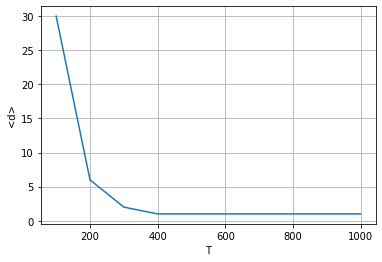

In [26]:
N = 15
M = 25
temperaturArray = np.linspace(100,1000,10)
dGjennomsnittArray = dGjennomsnittForFlereTemp(temperaturArray,N,M)
#Plottingen begynner her
plt.plot(temperaturArray,dGjennomsnittArray, label='<d>')        

plt.savefig('plot13.png', dpi=300, bbox_inches='tight') # lagrer figuren som en fil
plt.xlabel('T') #setter navn på x-aksen
plt.ylabel("<d>") #setter navn på y-aksen
plt.grid(1) #setter på rutenett
plt.show()
import winsound #funker ikke for mac
winsound.Beep(440, 500) #lager lyd når denne linja er nådd

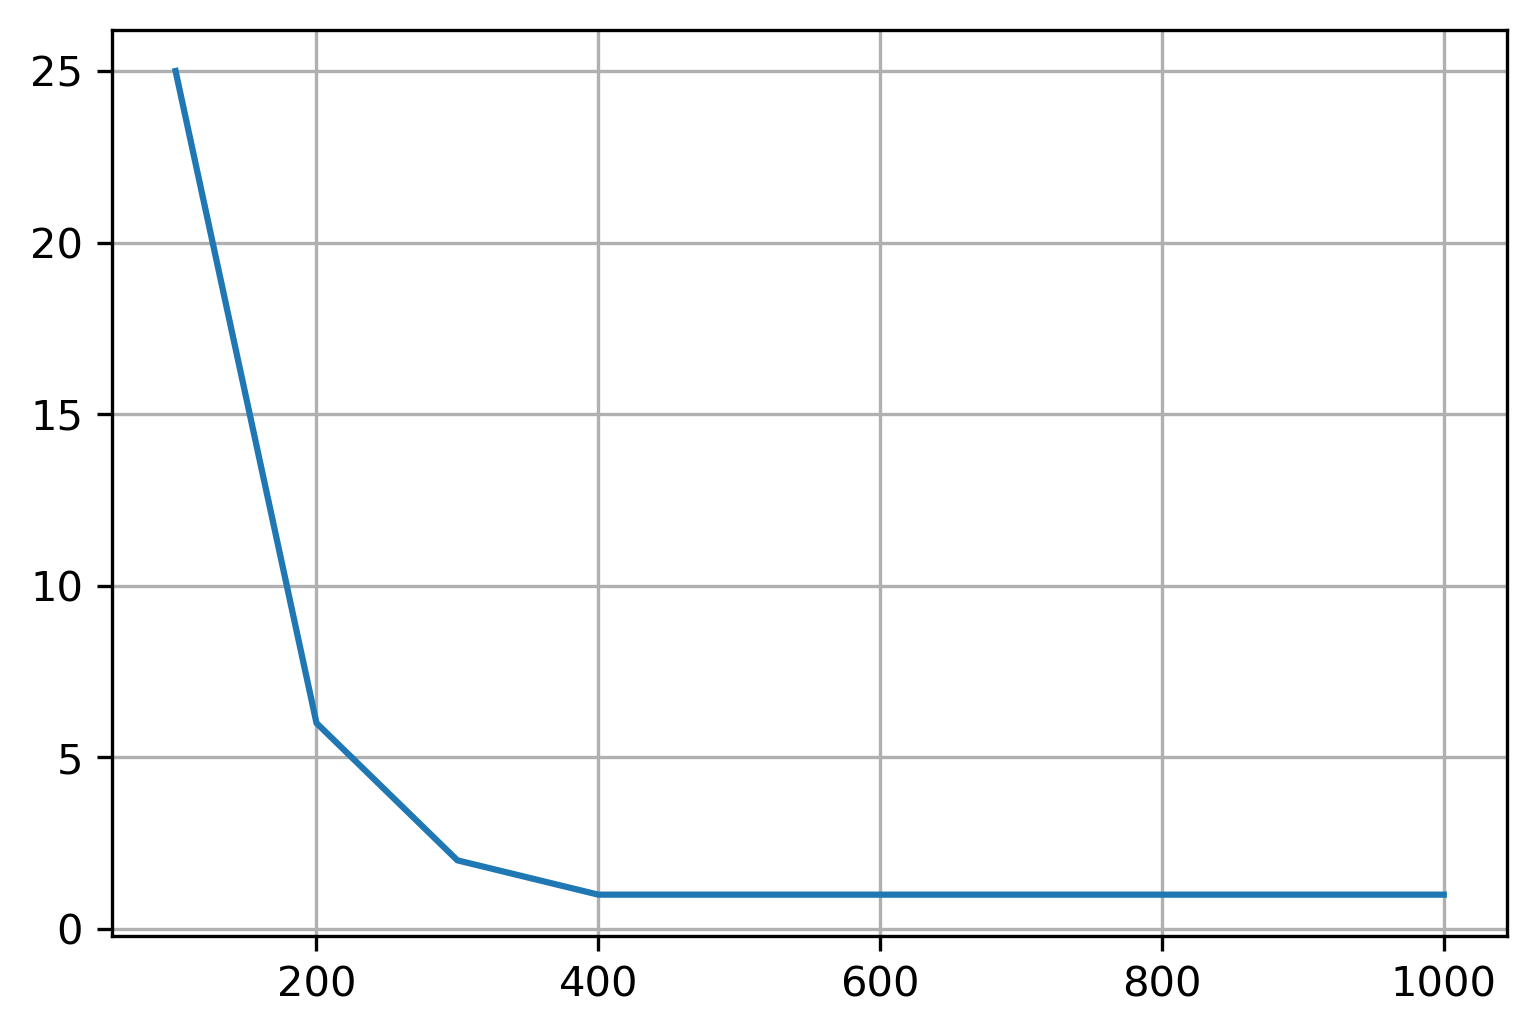

Klyngestørrelsen er liten for høye temperaturer fordi monomerene har høy nok energi til å skille seg fra andre monomerer. Og hvis monomerene har lavere energi så vil monomerene streve med å skille seg, og dermed danne store klynger - altså stor d-verdi.

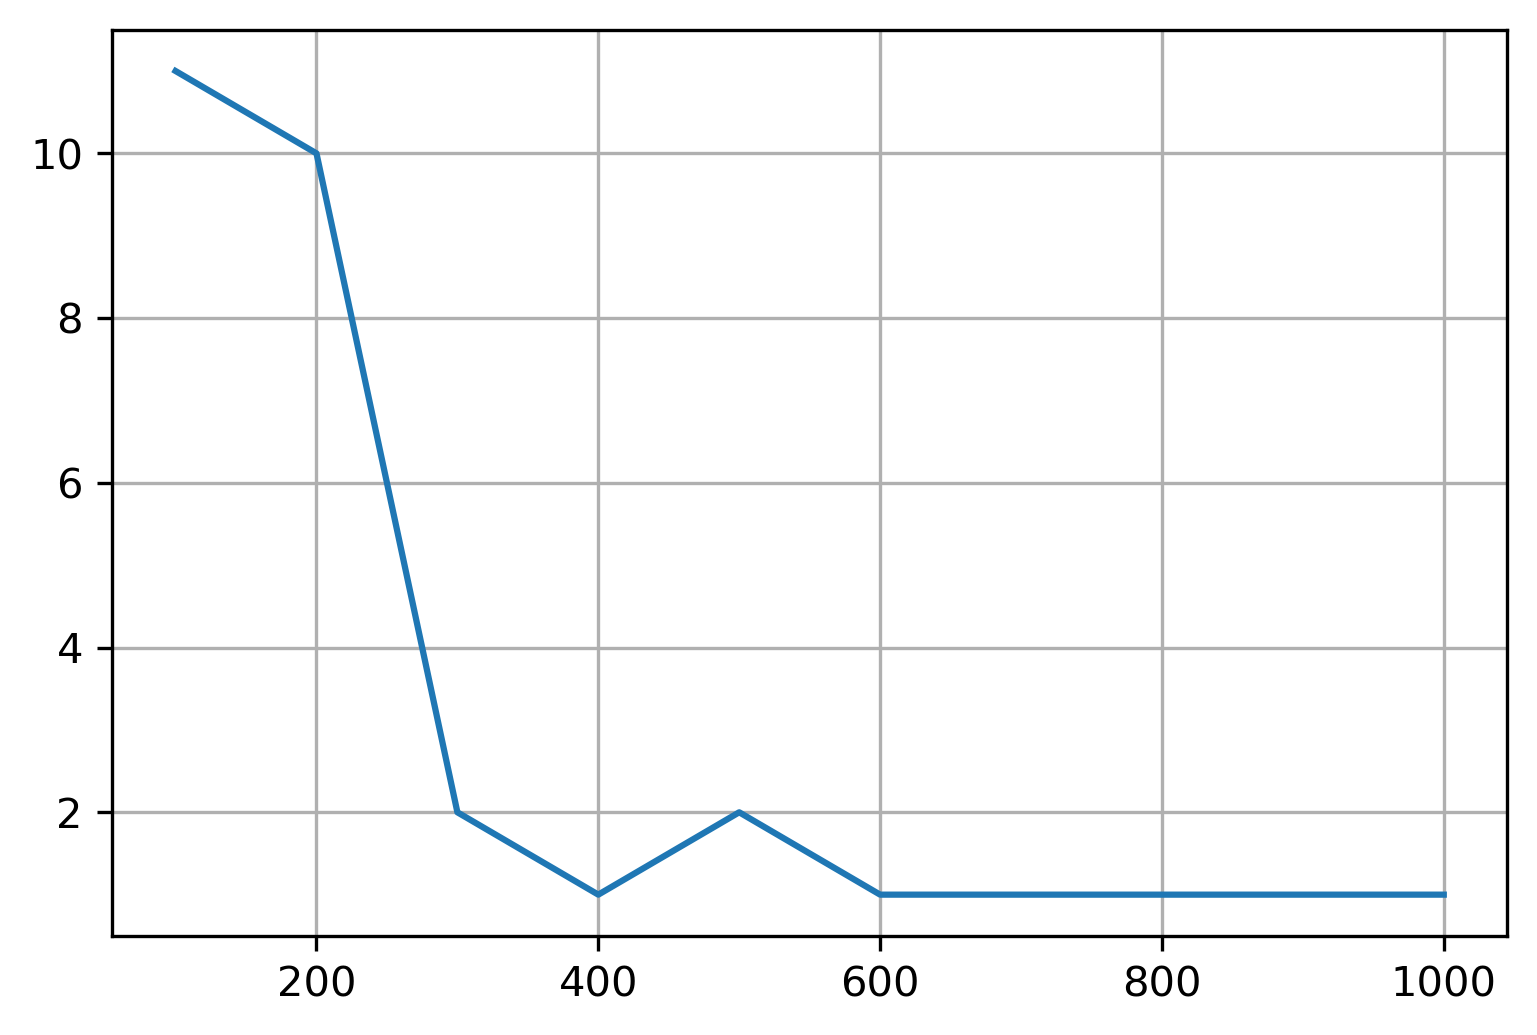

Fra statistikk vet vi at klyngestørrelsen (d) blir mer riktig når n går mot uendelig, fordi ved flere målinger minker usikkerheten til estimatoren for klyngestørrelsen. 

Fra disse to plotene ser vi at funksjonen ikke er entydig, men dette kan forklares fordi d-verdien baseres på tilfeldigheter og samtidig bruker en liten n-verdi. 

Vi ser at for lave temperaturer, så er forskjellen på d-verdien stor mellom ulike simuleringer. Dette er fordi ved lave temperaturer er det en tydelig tendens til økende klyngestørrelse. Og hvor stor klyngestørrelsen blir etter en simulasjon avhenger av utgangsgriden, og denne bestemmes tilfeldig. Grunnen til at dette fenomenet ikke oppstår for høye temperaturer er at tendensen ikke lenger er økende, men heller at monomerene skilles fra hverandre. Og her vil klyngestørrelsen konvergere raskere mot en, og samtidig ser vi at utgangsgriden har liten innflytelse.

#### OPPGAVE 2

#### PARAMETER  

$ε_r$ = 78  
a = 91 µm

Antallet monomerer som gjør et polymer blir beskrevet med tallet L. Lignende monomer-systemet, gir vi hvert polymer sitt eget tall, M. Som i første oppgave ønsker vi å plassere polymerer tilfeldig i et løsningsmiddel.

Her tar vi inn en matrise-størrelse (N) og antall ønskede polymerer (M), i tillegg til størrelsen på polymeret (L) (antall monomerer i et polymer). Deretter returnerer vi en grid med et visst antall polymerer som er tilfeldig plassert.

In [27]:
#Forklaring av parametervariabler
#N = gridstørrelse 
#M = monomerverdi
#L = lengden på hvert polymer

#finner tilfeldige x- og y-koordinater fra en gitt array
def finneRandomKoordinaterFraEnGittArray(array):
    randomIndex = np.random.randint(0, len(array)) #finner en randomIndex fra array
    x = array[randomIndex][0] #går inn i arrayen med randomIndex og finner x-verdi
    y = array[randomIndex][1] #går inn i arrayen med randomIndex og finner y-verdi
    
    return x, y, randomIndex
 
    
#Kan ikke bruk jit fordi vi bruker np.delete() med tre parametere
#Numba støtter kun np.delete() med to parametere 
def generereGridPolymer(N, M, L):
    gridArray = np.zeros((N,N),dtype=np.int64) #lager en NxN grid med nullverdier
    i = -M #begynner på den minste M-veriden
    
    while i <= M: #itererer gjennom alle mulige M-verdier (første while-løkka)
        if i != 0: #må sjekke om M er ulik null, fordi M ikke kan være null (første if-setning)
            
            #array som inneholder alle ledige plasser til et polymer 
            ledigeKoordinaterForHvertPolymer = np.zeros((4*L,2), dtype = np.int64) #naboArrayPolymer
            #polymerIndex bruker vi til å legge til nye verdier, og da slipper vi å bruke append
            naboArrayPolymerIndex = 0 
            
            
            ledigeKoordArray = np.argwhere(gridArray == 0) #finner alle koordinater der gridArray == 0
            if len(ledigeKoordArray) > 0:
                #finner et tilfeldig koordinat fra ledigeKoordArray
                x, y, randomIndex = finneRandomKoordinaterFraEnGittArray(ledigeKoordArray) 
                gridArray[x, y] = i #setter koordinatet som vi fant over lik den M-verdien vi itererer over
            else: #hvis ledigeKoordArray ikke har noen ledige koordinater så begynner vi å fylle griden helt på nytt
                print("test")
                i = -M 
                break
                
            
            #plasserer resten av monomerene i samme polymer 
            # k< L-1 siden vi allerede har plassert ett monomer, k begynner å telle fra 0
            k = 0
            while k < L-1: #må finne der vi kan plassere monomerer (andre while-løkka)
                #finner først naboene til den siste monomereren vi la ut
                #rekkefølge: høyre, venstre, opp, ned
                #returnerer en 2D-array
                naboerTilSistMonomer = faaNaboKoordinater(N,x,y)
                
                q = 0
                #iterer gjennom "naboerTilSistMonomer" for å sjekke om naboene ikke allerede innholder et monomer
                while q < 4: #(tredje while-løkka)
                    xNaboKoordinat = naboerTilSistMonomer[q][0] #henter ut x- og y-koordinater
                    yNaboKoordinat = naboerTilSistMonomer[q][1] #henter ut x- og y-koordinater
                    if gridArray[xNaboKoordinat, yNaboKoordinat] == 0: #sjekker om plassen er ledig, altså ikke inneholder en monomer
                        ledigeKoordinaterForHvertPolymer[naboArrayPolymerIndex] = [xNaboKoordinat, yNaboKoordinat]
                        naboArrayPolymerIndex +=1
                    
                    q+=1
                #Her avslutter tredje while-løkka
                    
                
                #slicer naboArrayPolymerIndex sånn at alle [0, 0](som ikke er naboKoordinater) 
                #koordinatene blir fjerna
                naboArrayPolymerSliced = ledigeKoordinaterForHvertPolymer[:naboArrayPolymerIndex,]
                
                
                #sjekker om naboArrayPolymerSliced har noen ledige koordinater (andre if-setning)
                if len(naboArrayPolymerSliced) > 0: 
                    #finner et tilfeldig koordinat fra naboArrayPolymer
                    x, y, randomIndex = finneRandomKoordinaterFraEnGittArray(naboArrayPolymerSliced) 
                    #setter koordinatet som vi fant over lik den M-verdien vi iterer over

                    #Siden vi har tillatt at et koordinat kan stå flere ganger i naboPolymerArray
                    #Så må vi sjekke om vi ikke velger et koordinat som vi allerede har valgt
                    #Kan ikke løses med np.delete siden den ikke sletter kopier
                    while gridArray[x, y] != 0:
                        x, y, randomIndex = finneRandomKoordinaterFraEnGittArray(naboArrayPolymerSliced)
                    gridArray[x, y] = i

                    #må fjerne koordinatet vi brukte over i naboArrayPolymer, slik at et monomer ikke blir overskrevet
                    ledigeKoordinaterForHvertPolymerSlettet = np.delete(ledigeKoordinaterForHvertPolymer, randomIndex, axis=0) 
                    ledigeKoordinaterForHvertPolymer = ledigeKoordinaterForHvertPolymerSlettet

                    #må trekke fra med en, slik at den ikke etterlater koordinat [0,0] for mye i neste iterasjon
                    naboArrayPolymerIndex-=1 


                    k+=1
                    
                else:
                    #hvis naboArrayPolymerSliced ikke har noen ledige koordinater så begynner vi å fylle griden helt på nytt
                    i = -M 
                    break
                #Her avsluttes andre if-setning
                              
            #Her avsluttes andre while-løkke

            i+=1
        
        else:
            i+=1
            
        #Her avsluttes første if-setning
        
    #Her avsluttes "while i <= M" - løkka
            

    return gridArray #returnerer en array med polymerer
 

[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [-1  0  0  1  1  1  1  1  1  1  1  0  0  0  0]
 [-1  0  0  1  2  1  1  1  1  1  0  0  0  0  0]
 [-1 -1  0  2  2  1  1  1  1  0  0  0  0  0  0]
 [-1 -1 -1  2  2  1  2  1  0  0  0  0  0 -1 -1]
 [-1 -1 -1  2  2  2  2  2  0  0  0  0  0 -1 -1]
 [-1 -1 -1  2  2  2  2  0  0  0  0  0  0  0 -1]
 [-1 -1  2  2  2  2  2  0  0  0  0  0  0  0 -1]
 [ 0  0  0  0  0  0  2  0 -2 -2 -2  0  0  0  0]
 [ 0  0  0  0  0  0  0 -2 -2 -2  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 -2 -2 -2 -2 -2  0  0  0]
 [ 0  0  0  0  0  0  0 -2 -2 -2 -2 -2 -2  0  0]
 [ 0  0  0  0  0  0  0  0 -2 -2  0  0 -2 -2  0]]


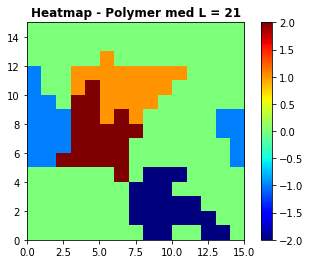

In [30]:
N = 15
M = 2
L = 21
gridForL21 = generereGridPolymer(N, M, L)
print(gridForL21)
visualisereGrid(gridForL21,N, M,"Polymer med L = 21")

Siden vi ser på polymerer nå er energi litt annerledes. De har ikke lenger bare fire naboer det er mulighet for flere enn det, og da må vi ta hensyn til det. Så vi utvider energifunksjonen vår fra første oppgave, slik at det kan kalkulere energien mellom polymerene. Det vil ikke utveksles noe energi mellom monomerer i samme polymer. 	

In [31]:
#Forklaring av parametervariabler
#grid: griden vi skal beregne energien til
#N: gridstørrelse 

@jit(nopython=True)
def totalEnergiAvGridPolymer(grid,N):
    energiTot = 0 #setter totalenergien lik 0
    alpha = 3.56*10**-22
    i = 0
    #itererer gjennom hele griden
    while i < N: #iterer gjennom y-aksen (første while-løkke)
        j = 0
        while j < N: #iterer gjennom x-aksen (andre while-løkke)
            naboKoordinaterArray = faaNaboKoordinater(N,i,j) #henter nabokoordinatene
            k = 0
            while k < 4:
                iNaboKoordinat = naboKoordinaterArray[k][0]
                jNaboKoordinat = naboKoordinaterArray[k][1]
                #sjekker at nabokoordinatene ikke har samme indeks som den monomeren som sjekkes og at naboen ikke er løsning og at monomeret ikke er løsning
                if (grid[iNaboKoordinat][jNaboKoordinat] != grid[i][j] and grid[iNaboKoordinat][jNaboKoordinat]!=0 and grid[i][j]!=0): 
                    #positiv multiplikasjon skal gi energi +1
                    if ((grid[iNaboKoordinat][jNaboKoordinat] * grid[i][j]) > 0): 
                        energi = alpha #ganger med alpha
                        
                    #negativ multiplikasjon skal gi energi -1
                    elif ((grid[iNaboKoordinat][jNaboKoordinat] * grid[i][j]) < 0): 
                        energi = -alpha #ganger med alpha
                        
                else:
                    energi = 0 #hvis det ikke er noen monomerer som nabo skal vi få energi 0
 

                energiTot += energi #legger til energien i energiTot
                k+=1
            j+=1
        i+=1
    
        
    if N == 2: #spesialtilfelle for en 2x2-matrise
        return (energiTot/4)
    else: #generelt 
        return (energiTot/2)

Disse polymerene kan bevege seg, og det kan skje på ulike måter. I denne oppgaven programmerte vi rigid bevegelse. Rigid bevegelse vil innebære at hele polymeren beveger seg som en enhet, senere vil vi se på annen type bevegelse.

In [32]:
#Forklaring av parametervariabler
#grid: griden med polymerene vi skal flytte
#polymerVerdi: polymeren vi skal flytte
#retning: retningen vi skal flytte polymereren
#Rekkefølge på flyttingen: 0 - høyre, 1 - venstre, 2 - opp, 3 - ned

@jit(nopython=True)
def flyttPolymer(grid, polymerVerdi, retning): 
    gammelGrid = np.copy(grid) #lager en kopi slik at vi kan beholde den gamle griden hvis vi trenger
    gridTemp = np.copy(grid) #dette er griden vi skal endre på underveis (flytte på monomerene)
    koordinaterTilPolymer = np.argwhere(grid==polymerVerdi) #lager en array med alle koordinatene til monomerene i polymeret
    N = grid.shape[0] #finner lengden av griden
    i=0
    sjekk = True #bool-variabel som returnerer True hvis flyttinga er vellykket og vice versa.
    gridTemp=np.where(grid != polymerVerdi, grid, 0) #setter alle monomerene med Polymerverdi lik null
    while i < koordinaterTilPolymer.shape[0]: #itererer gjennom alle koordinatene til polymeret
        #finner alle nabokoordinatene
        naboKoordinaterArray = faaNaboKoordinater(N, koordinaterTilPolymer[i][0],koordinaterTilPolymer[i][1]) 
        onskedeNaboKoordinater = naboKoordinaterArray[retning] #finner koordinatet i den ønskede retningen
        #sjekker betingelsene at det er ledig plass (null) ved polymeret eller at det er et monomer ved siden av med samme M
        if grid[onskedeNaboKoordinater[0], onskedeNaboKoordinater[1]]==0 or grid[onskedeNaboKoordinater[0], onskedeNaboKoordinater[1]]==polymerVerdi:
            if retning == 0 and koordinaterTilPolymer[i][1] == N-1: #retning mot høyre i borteste kolonne
                koordinaterTilPolymer[i][1] =0
            elif retning == 1: #retning mot venstre
                koordinaterTilPolymer[i][1] -=1
            elif retning == 0: #retning mot høyre
                koordinaterTilPolymer[i][1]  +=1
            elif retning == 2: #retning oppover
                koordinaterTilPolymer[i][0] -=1
            elif retning == 3 and koordinaterTilPolymer[i][0] == N-1: #retning nedover nederste rad
                koordinaterTilPolymer[i][0] =0 
            elif retning == 3: #retning nedover
                koordinaterTilPolymer[i][0] +=1
            gridTemp[koordinaterTilPolymer[i][0]][koordinaterTilPolymer[i][1]] = polymerVerdi #polymerindeks
        else: #hvis betingelsen ikke stemmer så returnerer vi den opprinnelige griden
            gridTemp[:,:] = gammelGrid[:,:] #setter gridTemp lik gammelGrid
            sjekk = False #flyttinga inneholdt et ulovlig steg
            break #breaker ut av while-løkka
        i += 1
   
    return gridTemp,sjekk

Nok en gang skal vi implementere Monte Carlo, men denne gangen for polymerer som beveger seg med rigid bevegelse. 

In [33]:
#Forklaring av parametervariabler
#N_s: antall MC steg
#grid: grid med polymerer
#N: gristørrelse
#M: monomerverdi
#T: temperatur 
#flyttPolymer: funksjonen som flytter et polymer
@jit(nopython=True)
def montecarloPolymer(N_s,grid,N,M,T,flyttPolymer):
    alpha = 3.56*10**-22 
    epsilon = np.zeros(N_s, dtype=np.int64) 
    gammelGrid = np.zeros((N,N),dtype=np.int64) 
    energi = totalEnergiAvGridPolymer(grid,N) #henter energien til den opprinnelige griden
    epsilon[0] = energi/alpha #setter første element i energiarrayen lik energien til den opprinnelige griden
    kb = 1.38*10**(-23)
    beta = 1/(kb*T) #definerer beta
    i = 0
    while i < N_s:
        gammelGrid = np.copy(grid) #lager en copy så vi kan gjenbruke griden om betingelsene under ikke stemmer
        p = random.random() #velger en tilfeldig sannsynlighet
        energi = totalEnergiAvGridPolymer(grid,N) #energi gammel grid
        polymer_verdi = random.randint(-M, M) #henter en tilfeldig polymerverdi
        retning = random.randint(0, 3) #0 = høyre, 1= venstre, 2=opp, 3=ned
        while polymer_verdi == 0: #hvis vi ikke får en gyldig polymerverdi, ønsker vi å generere en ny polymerverdi
            polymer_verdi = random.randint(-M, M)
            
        nygrid,sjekk = flyttPolymer(grid, polymer_verdi, retning) 
        if sjekk == True: #ser om trekket er lovlig
            nyEnergi = totalEnergiAvGridPolymer(nygrid,N) #energi gammel grid
            if nyEnergi < energi: #ser om nyenergien er mindre enn gammel. 
                grid = np.copy(nygrid) #kopier ny grid
                energi = nyEnergi #setter gammel enrgi lik ny
            elif p < np.exp(-beta*(nyEnergi - energi)): #ser om den tilfeldige sannsynligheten er lavere en exp-funksjonen
                grid = np.copy(nygrid) #kopier ny grid
                energi = nyEnergi #setter gammel enrgi lik ny
            else:
                """ikke gjør noe""" 
                
        epsilon[i] = energi/alpha  #legger til energien i energiarrayen      
        i+=1
        
    
        
    montecarlogrid = grid 
        
    return epsilon, montecarlogrid

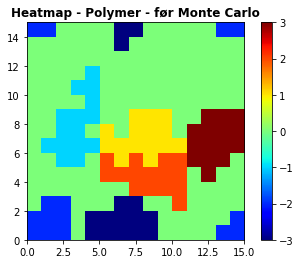

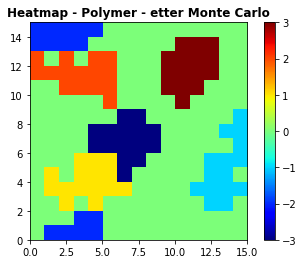

In [35]:
L = 15
M = 3
N = 15
N_s = 50000
T = 200

grid = generereGridPolymer(N,M,L)
x_n_s = np.linspace(0, N_s, N_s)
epsilonT200Rigid, gridEtterMontecarloRigid = montecarloPolymer(N_s,grid,N,M,T,flyttPolymer)
visualisereGrid(grid,N, M, "Polymer - før Monte Carlo")
visualisereGrid(gridEtterMontecarloRigid,N, M, "Polymer - etter Monte Carlo")

Vi kan se fra begge heatmapene at det ikke er en endring i formen på til polymerene, de har kun flyttet på seg. Dette gir mening siden polymerene kun flytter på seg som en enhet der formen er bevart.

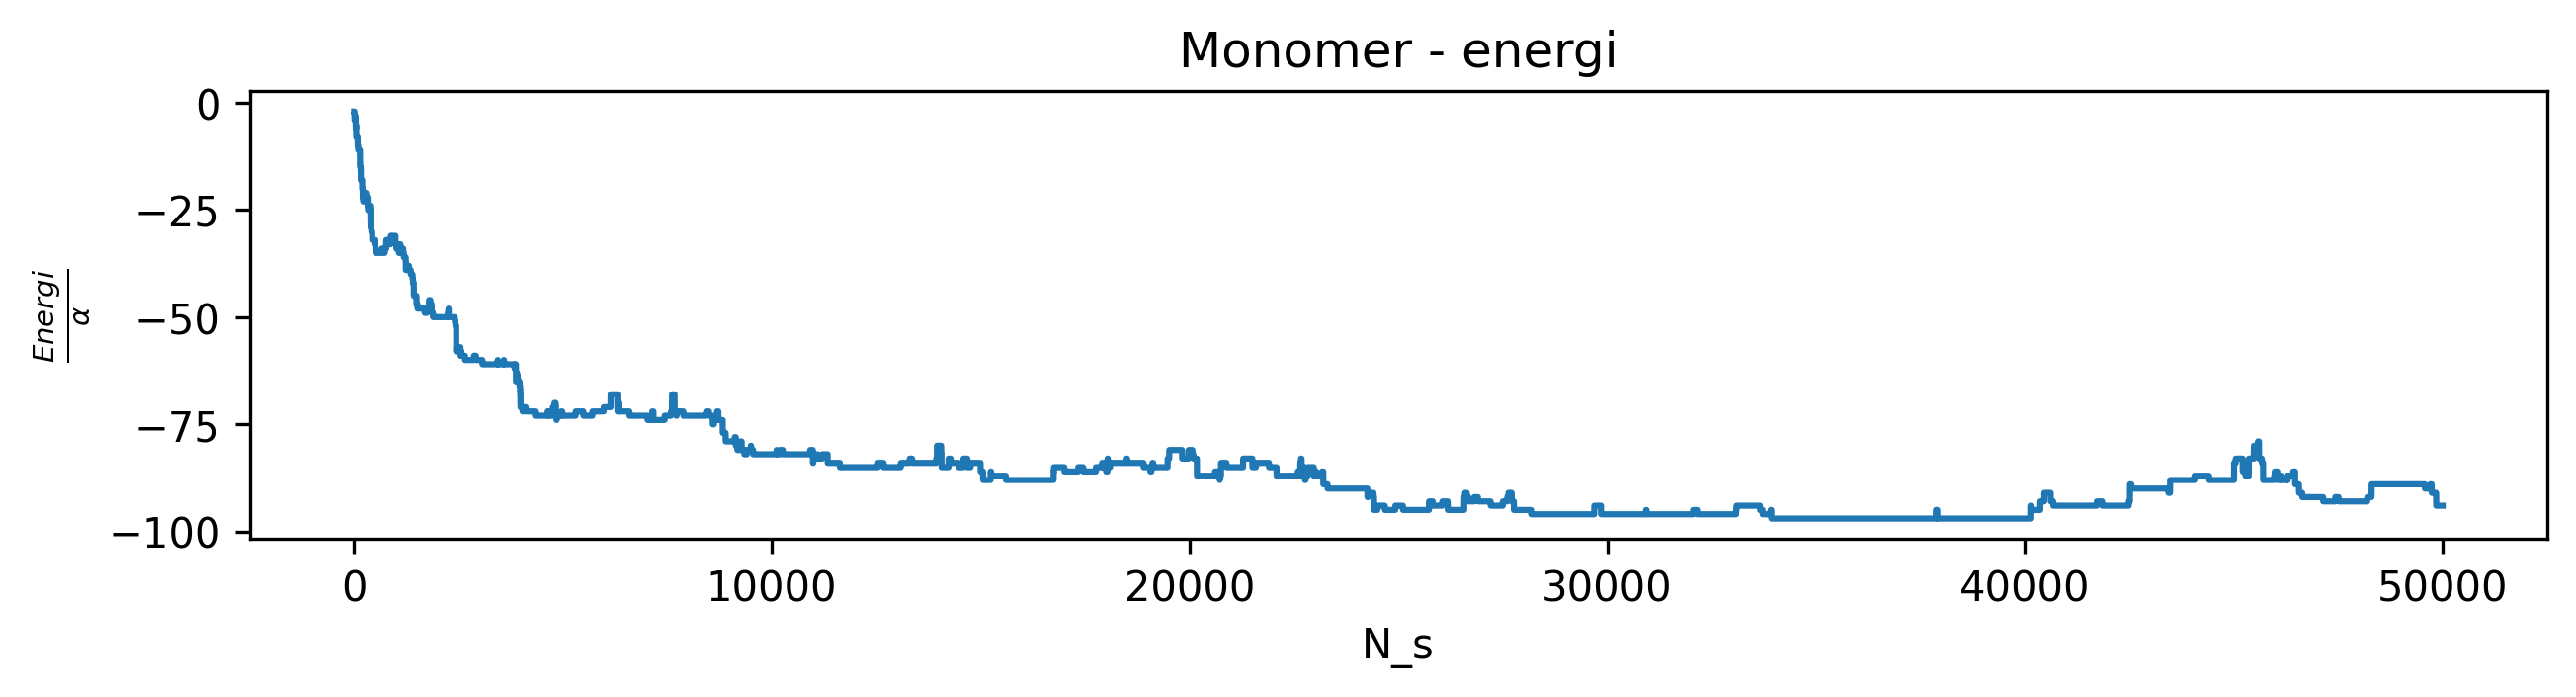

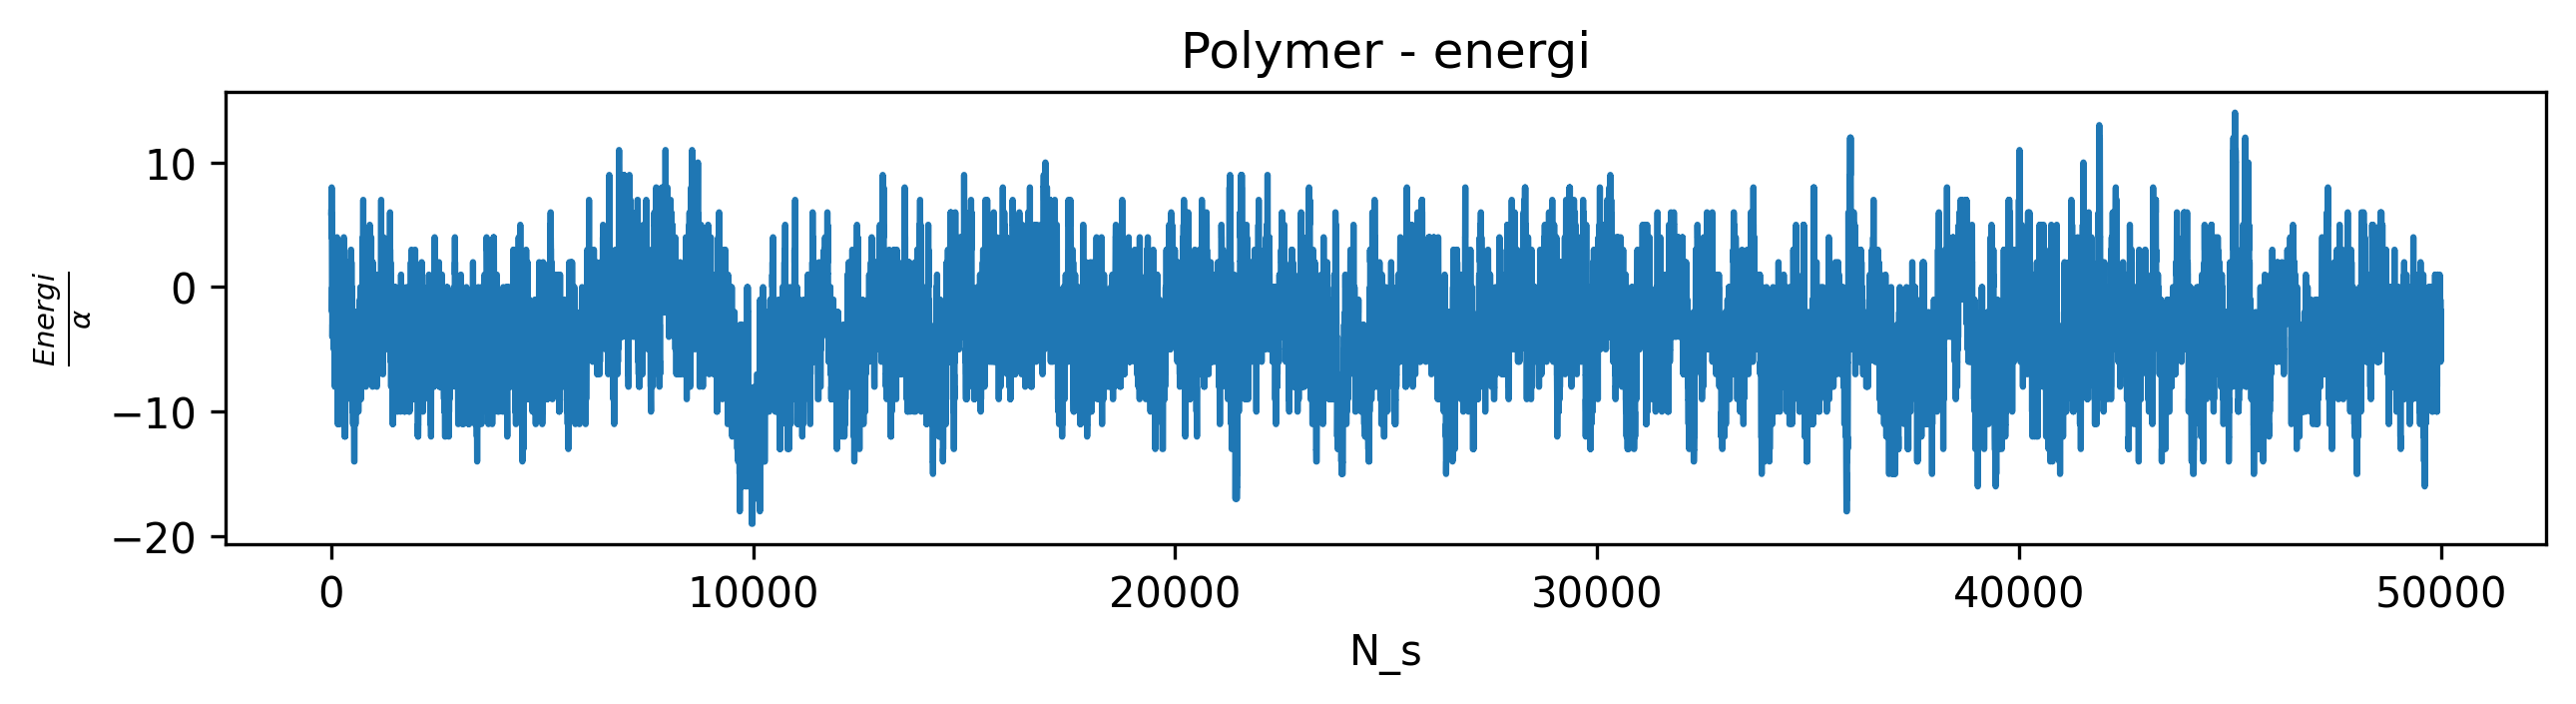

In [41]:
N_s = 50000
N = 15
M = 45
T = 200

x_n_s = np.linspace(0, N_s, N_s)
gridMonomer = generereGridMonomer(N, M)
epsilonMonomer, gridMontecarloMonomer = montecarloMonomer(N_s,gridMonomer, N, M, T)

M =3
L = 15
gridPolymer = generereGridPolymer(N, M, L)
epsilonRigidPolymer, gridMontecarloRigidPolymer = montecarloPolymer(N_s,gridPolymer,N,M,T,flyttPolymer)

plt.figure(figsize=(10, 2), dpi=300)
plt.title("Monomer - energi")
plt.xlabel('N_s')
plt.ylabel(r'$\frac{Energi}{α}$')
plt.plot(x_n_s,epsilonMonomer)
plt.show()

plt.figure(figsize=(10, 2), dpi=300)
plt.title("Polymer - energi")
plt.xlabel('N_s')
plt.ylabel(r'$\frac{Energi}{α}$')
plt.plot(x_n_s,epsilonRigidPolymer)
plt.show()

Fra et kvantitativt ståsted ser vi at plottene for monomer bruker mer tid på å nå likevekt, mens i polymer (rigid) ser vi likevekt i begynnelsen av Monte carlo simulasjonen. Dette kan forklares ved at det er et begrenset antall monomerer som kan bidra i den totale energien for et polymer-system. I monomer systemet har vi flere “frie” monomerer enn i polymerer, der mange av monomerene sitter låst i sentrum av “dråpen”. Dette kan vi se fra plottet, der maksimalverdien for energien i et monomer system er høyere enn for et polymer system. I tillegg har vi mange monomerer som kan interagere, så det vil ta lengre tid før likevekt er nådd. Derfor ser vi en tilnærmet $e^{-x}$ funksjon


Fra et algoritmisk ståsted ser vi at begge montecarlo simulasjonene er ganske like. Det som skiller dem fra hverandre er funksjonen som flytter monomerene/polymerene (flyttMonomer/flyttPolymer) og funksjonen som regner ut energien av systemet (totalEnergiAvGridMonomer/totalEnergiAvGridPolymer) samt måten polymerene er dannet sammenlignet med monomerene. 
I flyttPolymer er det færre lovlige steg enn i flyttMonomer. Dette resulterer i at det er mer sannsynlig å gjenta de samme stegene i flyttPolymer. Samtidig vil måten polymerene dannes føre til at det er mer sannsynlig å få en dråpeformet fasong enn det er å få en lang kjede med monomerer som letter gir opphav til interaksjoner. Dermed vil energien være høyere for monomer systemer.

Et polymer kan være ødelagt ved at linken mellom to monomerer i samme polymer blir brutt. Da vil også polymeret også være brutt. Vi implementerer en funksjon som kan bekrefte/avkrefte om polymeret er ødelagt. og returnerer den riktige griden basert på resultatet.

In [43]:
#Forklaring av parametervariabler
#MontecarloGrid = griden med monomerer vi skal sette sammen til klynger

@jit(nopython=True)
def recursiveklynge2(klyngeIndex, klyngeGrid, i,j,N, montecarloGrid, klyngeVerdi):
     #sjekker om punktet har en monomer og om verdien til monomereren er lik klyngeverdi (første if-setning)
    if montecarloGrid[i][j] != 0 and montecarloGrid[i][j] == klyngeVerdi: 
        klyngeGrid[i][j] = klyngeIndex #setter den lik klyngeIndex
        naboKoordinaterArray = faaNaboKoordinater(N,i,j) #finner nabokoordinatene til den monomereren
    #Her avsluttes første if-setning
        k = 0
        while k<4: #itererer gjennom alle nabokoordinatene (første while-løkke)
            iNaboKoordinat = naboKoordinaterArray[k][0] #henter ut i-verdien til nabokoordinatet 
            jNaboKoordinat = naboKoordinaterArray[k][1] #henter ut j-verdien til nabokoordinatet
                
            #sjekker om nabokoordinatet har en monomer og om den ikke er avdekket av clusterGrid
            if montecarloGrid[iNaboKoordinat][jNaboKoordinat] != 0 and klyngeGrid[iNaboKoordinat][jNaboKoordinat] == 0:
                recursiveklynge2(klyngeIndex, klyngeGrid, iNaboKoordinat,jNaboKoordinat,N, montecarloGrid, klyngeVerdi)
            
            k+=1 
        #Her avsluttes første while-løkke
        
    
@jit(nopython=True)
def klynge2(montecarloGrid):
    N = montecarloGrid.shape[0] #finner gridsize
    klyngeGrid = np.zeros((N,N), dtype=np.int64) #en NxN grid med nullverdier
    #klyngeIndex representerer verdien til en klynge. Alle monomerer i samme klynge har lik klyngeIndex
    klyngeIndex = 1

    i = 0
    #iterer gjennom griden 
    while i < N: #iterer gjennom y-aksen (første while-løkke)
        j = 0
        while j < N: #iterer gjennom x-aksen (andre while-løkke)
            #finner en monomer i griden, og som ikke er avdekket av clusterGrid (første if-setning)
            if montecarloGrid[i][j] != 0 and klyngeGrid[i][j] == 0:
                klyngeVerdi = montecarloGrid[i][j]
                recursiveklynge2(klyngeIndex, klyngeGrid, i,j, N, montecarloGrid, klyngeVerdi)
                klyngeIndex +=1
            #Her avsluttes første if-setning
                
            j+=1
        #Her avsluttes andre while-løkke
        i+=1
    #Her avsluttes første while-løkke
        

    return klyngeGrid, klyngeIndex

Som nevnt tidligere kan polymerene bevege seg på flere måter, en mer komplisert bevegelse som kan skje er medium flexibility. Det innebærer at hver monomer i polymeren flyttes ett steg i samme retning. Hvis noen av disse monomerene kolliderer med en monomer som tilhører en annen polymer, flyttes ikke hele raden/kolonnen der dette skjer, men den forblir på samme sted. 

In [42]:
#Forklaring av parametervariabler
#grid: griden med polymerer
#polymerVerdi: polymeren vi skal flytte
#retning: retningen vi skal flytte polymereren

@jit(nopython=True)
def flyttPolymerMediumFlexibility(grid, polymerVerdi, retning):
    gridTemp = np.copy(grid) #lager en kopi slik at vi kan beholde den gamle griden hvis vi trenger
    koordinaterTilPolymer = np.argwhere(grid==polymerVerdi) #lager en array med alle koordinatene til monomerene i polymeret
    lengdeAvKordTilPoly = koordinaterTilPolymer.shape[0] 
    N = grid.shape[0]  #finner lengden av griden
    
    holderKoordArrayKolonne = np.zeros(N, dtype=np.int64) #lager en tom array som kan holde fast kolonnen
    holderKoordArrayRad = np.zeros(N, dtype=np.int64) #lager en tom array som kan holde fast raden
    
    i=0
    sjekk = True
    gridTemp=np.where(grid != polymerVerdi, grid, 0) #setter alle monomerene med Polymerverdi lik null
    while i < lengdeAvKordTilPoly: #itererer gjennom alle koordinatene til polymeret
        naboKoordinaterArray = faaNaboKoordinater(N, koordinaterTilPolymer[i][0],koordinaterTilPolymer[i][1]) #finner alle nabokoordinatene
        onskedeNaboKoordinater = naboKoordinaterArray[retning] #finner koordinatet i den ønskede retningen
        #sjekker betingelsene at det er løsning ved polymeret eller at det er et monomer ved siden av med samme M
        if grid[onskedeNaboKoordinater[0], onskedeNaboKoordinater[1]]==0 or grid[onskedeNaboKoordinater[0], onskedeNaboKoordinater[1]]==polymerVerdi:
            if retning == 0 and koordinaterTilPolymer[i][1] == N-1: #retning mot høyre i borteste kolonne
                koordinaterTilPolymer[i][1] =0
            elif retning == 1: #retning mot venstre
                koordinaterTilPolymer[i][1] -=1
            elif retning == 0: #retning mot høyre
                koordinaterTilPolymer[i][1]  +=1
            elif retning == 2: #retning oppover
                koordinaterTilPolymer[i][0] -=1
            elif retning == 3 and koordinaterTilPolymer[i][0] == N-1: #retning nedover nederste rad
                koordinaterTilPolymer[i][0] =0
            elif retning == 3: #retning nedover
                koordinaterTilPolymer[i][0] +=1
            gridTemp[koordinaterTilPolymer[i][0]][koordinaterTilPolymer[i][1]] = polymerVerdi #polymerindeks
        else:
            
            if retning == 0 or retning == 1:
                #skal ikke flytte på raden
                rad = koordinaterTilPolymer[i][0]
                holderKoordArrayRad[rad] = 1
            else:
                #skal ikke flytte på kolonna
                kolonne = koordinaterTilPolymer[i][1]
                holderKoordArrayKolonne[kolonne] = 1
        i+= 1
    
    
    j=0
    while j < holderKoordArrayRad.shape[0]:
        if holderKoordArrayRad[j] != 0:
            gridTemp[j, :] = grid[j,:]
        j+=1
        
        
        
    j = 0
    while j < holderKoordArrayKolonne.shape[0]:
        if holderKoordArrayKolonne[j] !=0:
            gridTemp[:,j] = grid[:,j]
        j+=1
               
    gridOdelagtFunk, klyngeIndex = klynge2(gridTemp)
    
    if (klyngeIndex-1) != 2*M:
        sjekk = False
        gridTemp[:,:] = grid[:,:]
   
    return gridTemp,sjekk

Ønsker igjen å bruke Monte Carlo funksjonen, men denne gangen for polymerer som beveger seg med medium flexibility. 

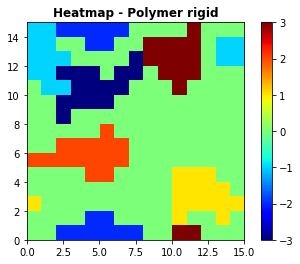

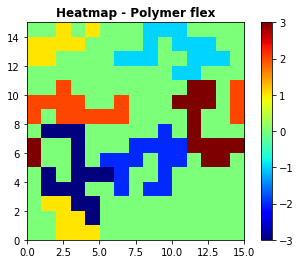

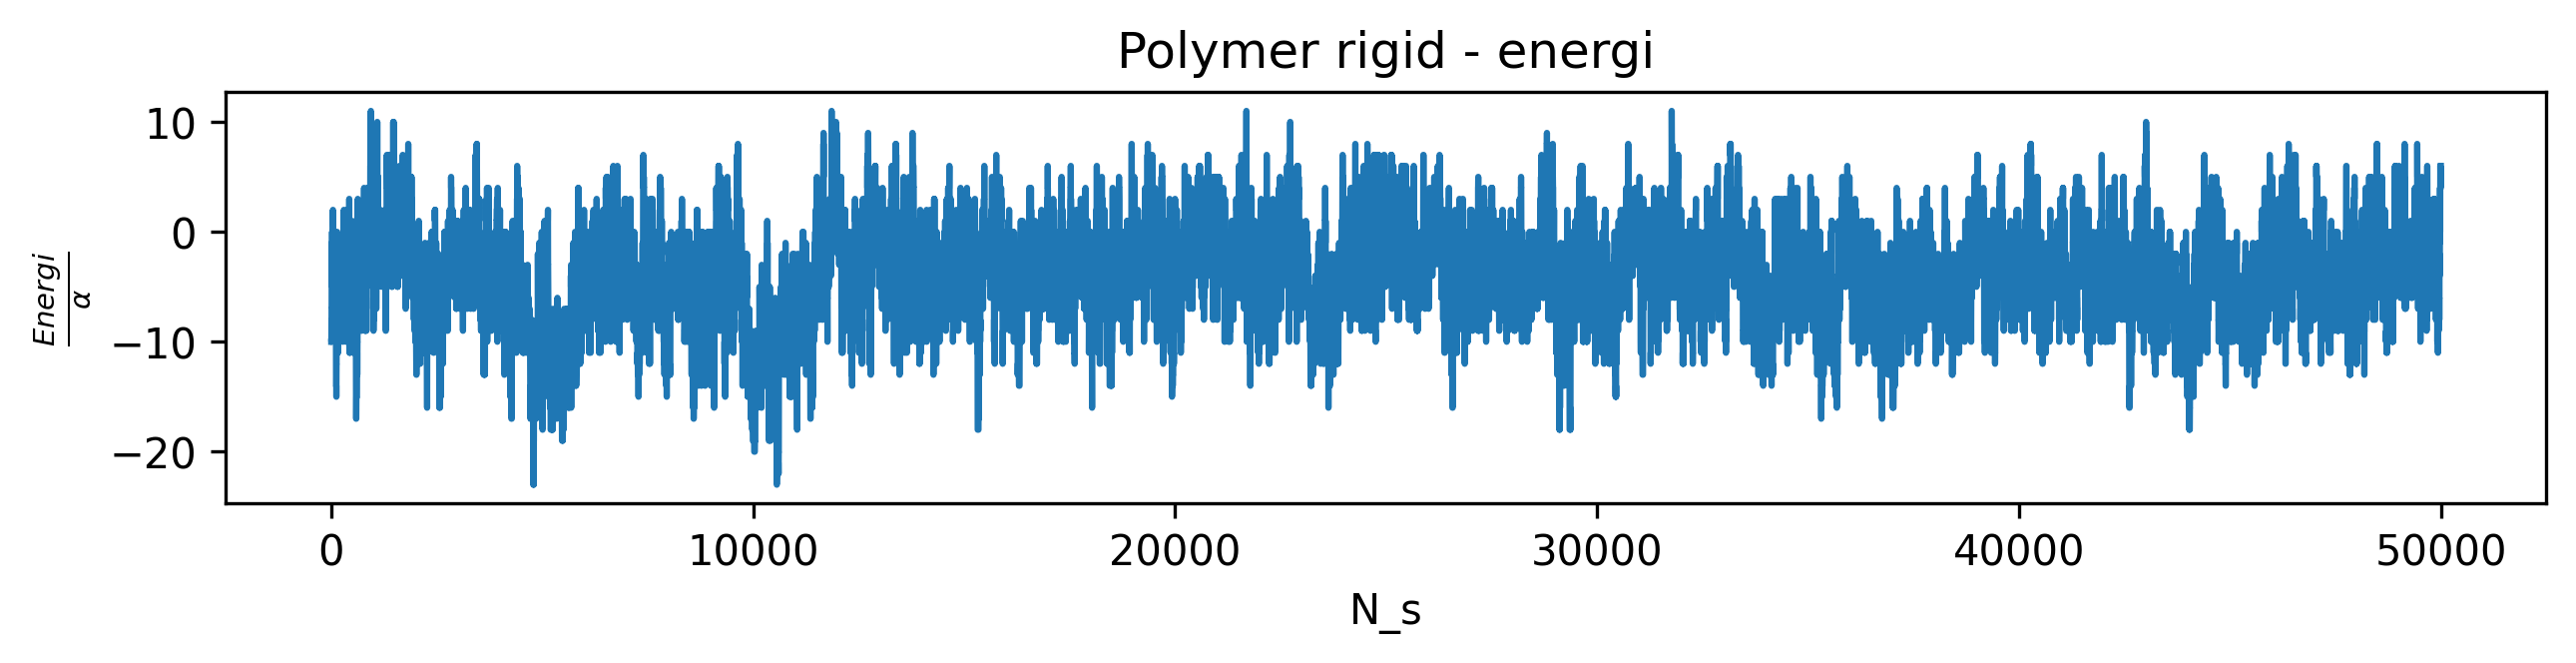

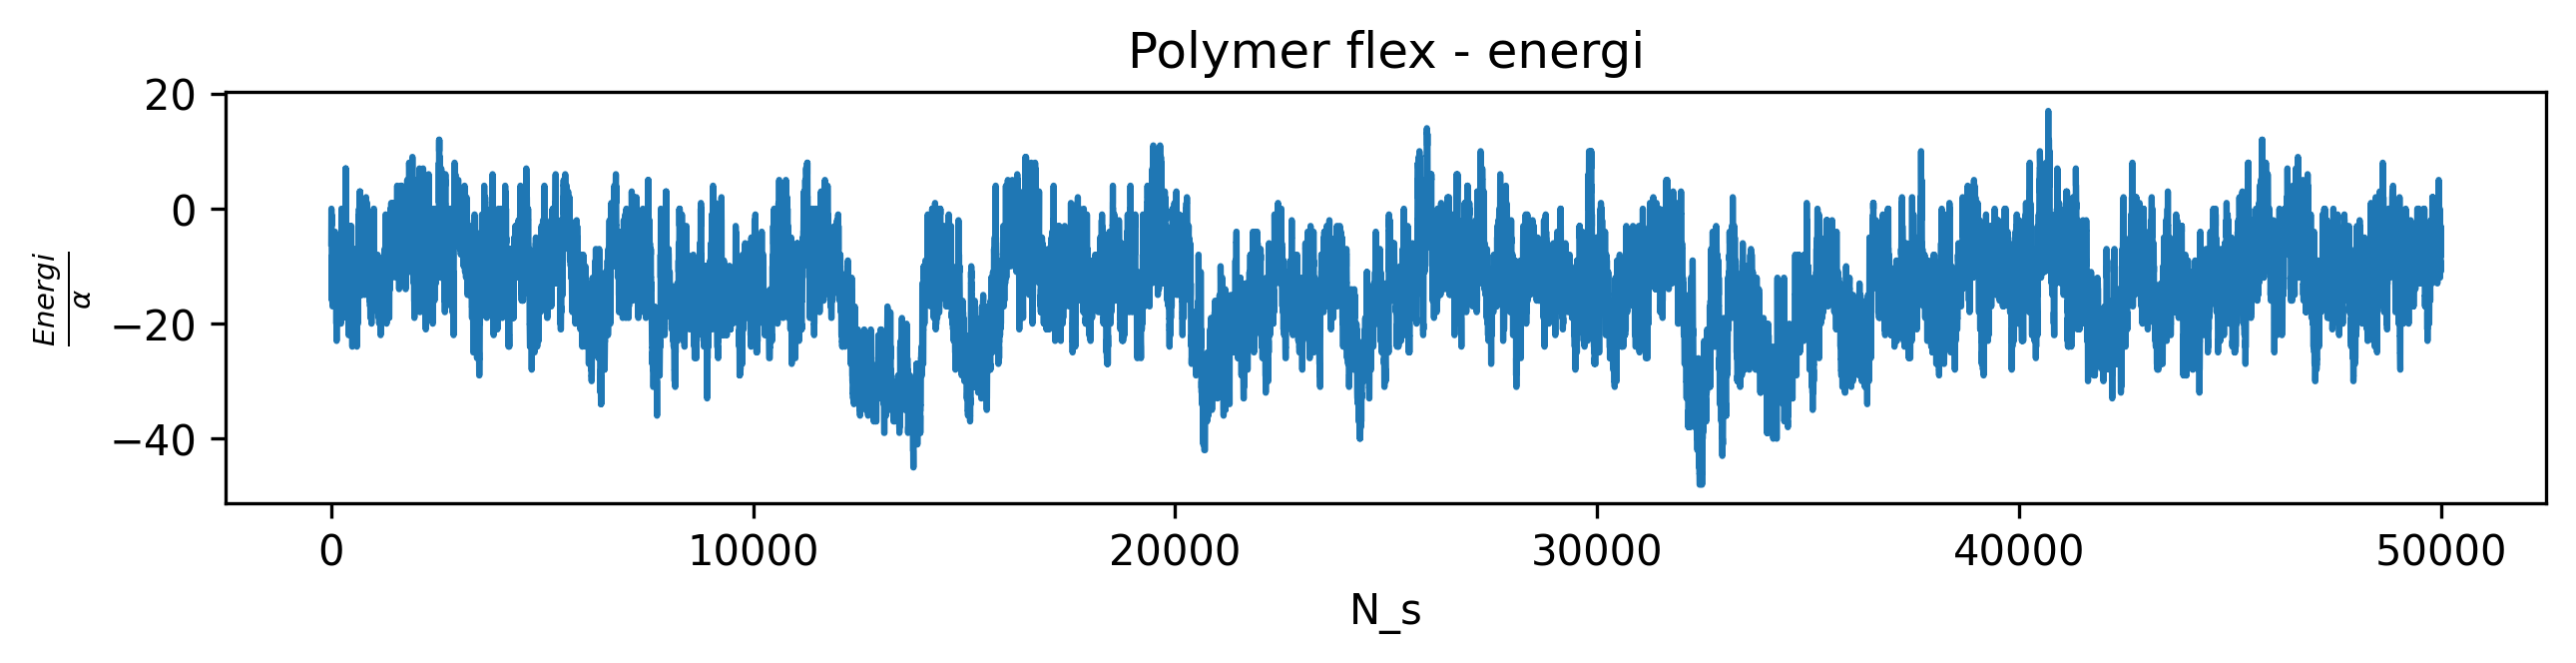

In [47]:
L = 15 #antall monomerer i en polymer
M = 3 #monomerverdi
N = 15 #gridstørrelse
N_s = 50000 #MC steg
T = 200 #temperatur


grid = generereGridPolymer(N,M,L) #lager en grid med polymerer

#kjører MC med både flex og rigid for griden
epsilonRigid, gridMontecarloRigid = montecarloPolymer(N_s,grid,N,M,T,flyttPolymer)
visualisereGrid(gridMontecarloRigid, N, M, "Polymer rigid")
epsilonFlex, gridMontecarloFlex = montecarloPolymer(N_s,grid,N,M,T,flyttPolymerMediumFlexibility)
visualisereGrid(gridMontecarloFlex, N, M, "Polymer flex")

#Plottet begynner her
plt.figure(figsize=(10, 4), dpi=300)
plt.subplot(211)
plt.title("Polymer rigid - energi")
plt.xlabel('N_s')
plt.ylabel(r'$\frac{Energi}{α}$')
plt.plot(x_n_s,epsilonRigid)
plt.show()

plt.figure(figsize=(10, 4), dpi=300)
plt.subplot(212)
plt.title("Polymer flex - energi")
plt.xlabel('N_s')
plt.ylabel(r'$\frac{Energi}{α}$')
plt.plot(x_n_s,epsilonFlex)
plt.show()

I vår siste store simulering ønsker vi å undersøke hvordan gjennomsnittsstørrelsen (d) og gjennomsnitt av antall klynger (m) avhenger av L. 

Forskjellen på polymerene i rigid move og flex er at i flex ser vi at polymerene er mer strukket ut, og i noen tilfeller spiraler. Men i rigid move er formen fortsatt som dråper. 

Energien i rigid move er i likevekt fra begynnelsen. Men i flex ser vi et tydelig knekk rett etter 10000 steg. Dette skjer på grunn av at overflaten til polymerene endrer seg noe som vil påvirke energien. Fordi da er flere monomerer i et polymer mer tilgjengelig til å interagere med andre monomerer fra andre polymerer. Dermed vil den totale energien i systemet øke eller minke. I motsetning til i rigid hvor mange av monomerene er låst inni "sentrum" av dråpen. Det vil si at vi har et visst antall tilgjengelig monomerer som kan reagere med andre monomerer (fra andre polymerer). Dette antallet vil til en hver tid være konstant i rigid move. I tillegg kan vi se at verdimengden til polymer flex er større nok engang kommer dette av at det er flere polymerer som kan iteragere

In [48]:
def dOgMGjennomsnitt(N,M,T,L_array):
    d_liste = np.zeros(13,dtype=np.int64) #lager en NxN grid med bare nullverdier
    m_liste = np.zeros(13,dtype=np.int64) #lager en NxN grid med bare nullverdier
    g = 0
    nmax = 10
    t_equil = 10000
    t_r = 1000
    while g < 13:
        n=0
        darray = np.zeros(nmax, dtype=np.int64) #lager en NxN grid med bare nullverdier
        marray = np.zeros(nmax, dtype=np.int64) #lager en NxN grid med bare nullverdier
        grid = generereGridPolymer(N, M,L_array[g]) #lager grid 
        print("rounde",g)# printer hvor langt den har kommet i prosessen 
        while n < nmax:  
            N_s = t_equil + t_r*n #her bestemmer vi hvor lenge den skal kjøre
            epsilon,montecarlogrid = montecarloPolymer(int(N_s),grid,N,M,T,flyttPolymerMediumFlexibility)
            clusterGrid, clusterIndex = klynge(montecarlogrid, M)
            marray[n] = (clusterIndex-1) #lager en array som vi bruker til å regne gjennomsnittet med
            m = np.mean(marray) #regner gjennomsnitet 
            darray[n] = dgjennomsnitt(clusterGrid, clusterIndex) #lager en array som vi bruker til å regne gjennomsnittet med
            d = np.mean(darray) #regner gjennomsnitet 
            m_liste[g] = m #fyller arrayen vi ønsker å plotte
            d_liste[g] = d/L_array[g] #fyller arrayen vi ønsker å plotte
            grid = montecarlogrid #lagrer grid for neste kjøring
            n+=1
        g += 1
    return d_liste, m_liste

g 0
g 1
g 2
g 3
g 4
g 5
g 6
g 7
g 8
g 9
g 10
g 11
g 12


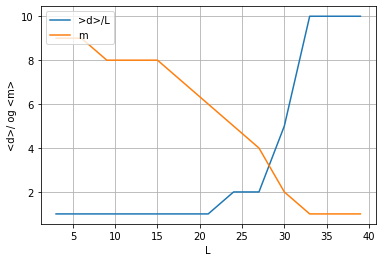

In [51]:
T = 300
N = 30
M = 5
L_array = np.arange(3,42,3) #lager en array med alle L verdiene vi ønsker


d_liste,m_liste = dOgMGjennomsnitt(N,M,T,L_array) 
plt.plot(L_array,d_liste,label=">d>/L")
plt.plot(L_array,m_liste, label="m")
plt.xlabel('L') #setter navn på x-aksen
plt.ylabel("<d>/ og <m>") #setter navn på y-aksen
plt.legend(loc="upper left") #plasserer legend i venstre hjørnet 
plt.grid(1) #setter på rutenett
plt.savefig('plotavdogm_n=10_ogt_equil=10000.png', dpi=300, bbox_inches='tight') # lagrer figuren som en fil
plt.show() #aktivere plottet 
import winsound #funker ikke for mac
winsound.Beep(440, 500)  #lager lyd når denne linja er nådd

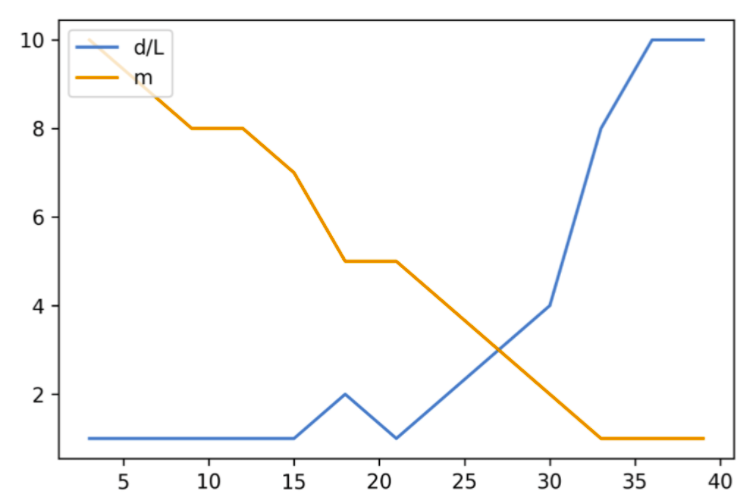
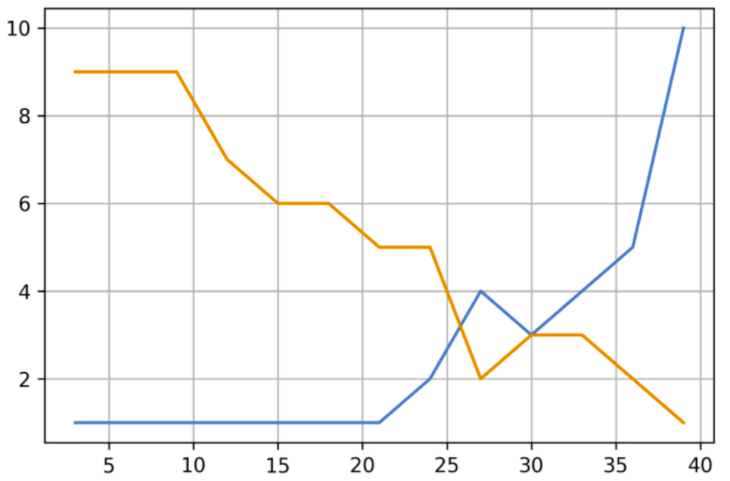
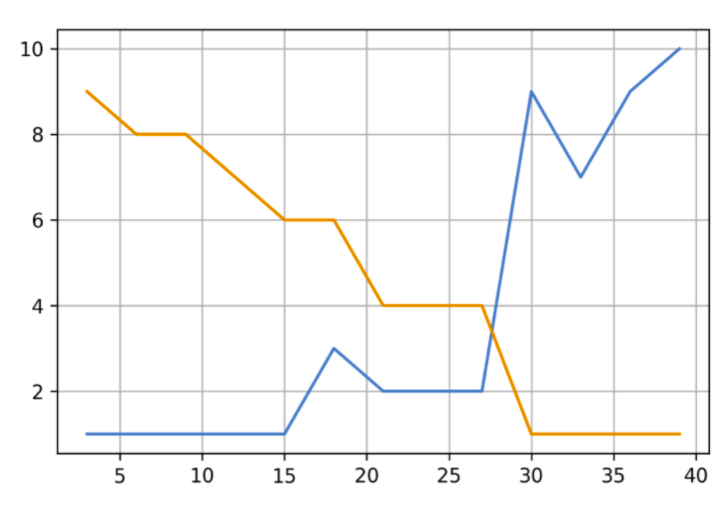

Fra energi plottet til mediumflex ser vi at likevekten er oppnådd etter 10000 steg. Da må vi velge t_equil større enn 10000 steg. vi har valgt n = 10 siden nøyaktigheten vi får for større n verdier ikke er verdt tiden det tar å kjøre simulasjonen. Når det er sagt vet vi at at større n verdier fører til bedre resultater. 

m er antall klynger og når L øker vil flere og flere av klyngene smelte sammen, og til slutt har vi en stor klynge og vi konvergerer mot m = 1.

$<d>$ er gitt ved   $\frac{\sum{monomerer}}{antall klynger}$ = $\frac{2ML}{m}$. 
$\frac{<d>}{L}$ er da gitt ved $\frac{2M}{m}$. Altså vil $<d>$
være omvendt proporsjonal med m


For store L verdier vil måten polymerene beveger seg være ubetydelig sammenlignet med små L verdier. Dette er fordi sannsynligheten for at polymerene kolliderer øker i takt med L. Og da forventer vi at alle polymerene er i kontakt med hverandre. For de små L verdiene i rigid bevegelse mistenker vi at det ikke kommer til å være en tydelig tendens som for flex. 
Fordi for flex polymer vet vi at det kan oppstå spiraler og da vil polymeren regnes som en klynge. Samtidig har polymeren fortsatt muligheten til å utvide klyngen ved at den andre enden når en annen polymer. Dette er ikke mulig for rigid polymer. For rigid polymeren kan det ikke oppstå spiraler og dermed kan polymeren trekker seg tilbake og ikke lenger være en del av klyngen. Dette baserer seg på sannsynlighet, og derfor ser vi ikke et tydelig mønster. Videre tror vi at d vil fortsatt være omvendt proporsjonal med m. Fordi formelen gjelder uavhengig bevegelsestypen.

Siden det tar lang tid å kjøre så har vi inkludert noen bilder av hvordan plottene våre ser ut for n = 10. 

### Konklusjon


I begynnelsen så vi for et polymer system med L = 1. Her har vi funnet ut av energien til systemet er temperaturavhengig. I tillegg når vi likevekt raskere for høye temperaturer siden det er lettere for monomerene å bryte seg fra hverandre slik at ikke oppstår en konvergens og dermed kun oscillerer mellom noen gitte verdier. Samtidig fant vi ut at klyngestørrelsen også er temperaturavhengig. Og denne konvergere mot 1 for høye temperaturer.

Videre tar vi for et mer komplisert polymer system, siden L kan være større enn 1. Vi har sammenlignet N_s for monomer systemet og for polymer rigid systemet. Her så vi det var mange låste monomere i polymer rigid systemet. Dette resulterer i at det er færre interaksjoner slik at vi oppnår likevekt raskere. Dette gjelder derimot ikke for monomer systemer. Her er alle monoerene fri slik at vi trenger flere iterasjoner (større N_s) for at Monte carlo simulasjonen skal nå likevekt. 

Deretter utviklet vi bevegelsen til polymerene, slik at vi fikk flere lovlige bevegelser. Disse dannet lange kjeder med polymerer, som videre kunne danne spiraler eller såkalte knuter med andre ulike polymerer. Disse spiralene viser seg ikke bare på heatmapet, men også i energi plotet. Dette ser vi ved at verdimengden var mye større for flex enn for rigid. Grunnen til dette er fordi vi får flere interaksjoner mellom monomerer når overflaten til polymerene strekker seg ut i lange kjeder. Og når disse lange kjedene danner spiraler, vil det være flere interaksjoner - noe som skjer i flex.